# Block C: Creative Brief Template

Please, use this template to write down your solutions to the [DataLab Tasks](). If you have any questions, please, contact your mentor or the content responsible. 

## Important Notes:
- [ ] Please, rename the file to ```CreativeBrief_<your_name>_<studentnumber>.ipynb``` before submitting it. 
- [ ] Upload this template to the 'Deliverables' folder in you BUas GitHub repository.
- [ ] You are allowed to add as many (Markdown/Python) cells as you need. 
- [ ] If more iteration steps were performed for the tasks in Section 3, please add more iteration sections.
- [ ] If less iteration steps were needed for the tasks in Section 3, please remove the empty iteration sections.
- [ ] If the task requires you to only write code or text, please, delete the unnecessary cell.
- [ ] Your work should be reproducible, meaning that we should be able to run your code in the template and get the same results as you did. Tip: use relative paths to load your data!
- [ ] Ensure that before you hand in the template, you press ```Restart & Run all```; we should be able to see the results of your code in the notebook (i.e., output cells).
- [ ] Ensure that your code in the template is ```error-free```. In other words, we should not see any error messages when we run your code.

### ***Import's list***

In [113]:
# Import libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings 
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from IPython.display import Image
# Deep learning libraries
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, MobileNet
from keras.regularizers import l2
from collections import Counter
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.colors as colors

warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf

# Get list of available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


# Section 1 - Business Understanding (Week 1, Market Research for Product Development, Stakeholders & DAPS)

## Task 1.1: Market Research

#### The global market for brain tumor therapeutics is witnessing significant growth, driven by various factors such as the increasing incidence of brain tumors, advancements in medical technology, and the continuous need to enhance treatment outcomes and patients' quality of life. Here is a detailed overview of the market research findings from various sources:

***Market Size and Growth Projections***

- **Facts and sources**:
    - The Brain Tumor Therapeutics Market was valued at USD 1.20 Billion in 2019 and is projected to reach USD 3.09 Billion by 2027, with a Compound Annual Growth Rate (CAGR) of 12.5% from 2020 to 2027.
        - Source: https://www.linkedin.com/pulse/global-brain-tumor-therapeutics-market-size/

    - The global market for brain tumor therapeutics is expected to grow from $1.1 billion in 2018 to reach $2.0 billion by 2023 at a CAGR of 12.9%.
        - Source: https://www.bccresearch.com/market-research/pharmaceuticals/brain-tumor-therapeutics-markets.html

    - The brain tumor treatment market is anticipated to accumulate a market value of US$ 3,114.2 million in 2023 and is expected to grow at a CAGR of 7.2% in the forecast period.
        - Source: https://www.futuremarketinsights.com/reports/brain-tumor-treatment-market

    - The brain tumor drugs market size was valued at USD 1.80 billion in 2022 and is projected to grow to USD 3.72 billion by 2030, exhibiting a CAGR of 10.2% during 2023-2030.
        - Source: https://www.fortunebusinessinsights.com/brain-tumor-drugs-market-105025

The increasing awareness of neurological diseases and the rising incidence of brain cancer are propelling the demand for brain tumor drugs and treatments. Technological advancements, particularly in targeted therapies, immunotherapy, and gene therapy, are enhancing the precision and efficacy of brain tumor treatments. Overall, the brain tumor market shows promise for substantial growth, driven by heightened awareness, technological progress, and a focus on personalized medicine. This growth presents opportunities for innovation and the development of novel therapeutic solutions to address the growing prevalence of brain tumors and enhance patient outcomes.

## Task 1.2: Stakeholder Analysis

__1. Characteristics__
- ***Medical Professionals***:    
    - Expertise in brain tumor treatment, crucial for guiding treatment decisions and advancements in care.
- ***Pharmaceutical Companies***:    
    - Develop brain tumor drugs, pivotal in driving innovation and providing treatment options.
- ***Patients and Caregivers***:    
    - Directly impacted by brain tumor treatments, their experiences offer valuable insights for improving care.
- ***Government Health Agencies***:    
    - Regulate and fund brain tumor research, influencing policies and funding allocation.
- ***Research Institutions***:    
    - Conduct studies on brain tumor models and treatments, contributing to scientific advancements.
- ***Insurance companies***:     
    - Provide funds for surgeries and may be involved in legal actions related to brain tumors, impacting access to care.

__2. Prioritization__
- ***High Power, High Interest***:    
    - Medical Professionals, Pharmaceutical Companies: Key stakeholders driving treatment innovation and patient care.
- ***High Power, Low Interest***:    
    - Government Health Agencies: Important regulators and funders, although with lower direct interest.
- ***Low Power, High Interest***:    
    - Patients and Caregivers, Research Institutions: Vital for understanding patient needs and advancing research.

__3. Main stakeholder__
- ***Identified Main Stakeholder***: 
    - Medical Professionals: Essential decision-makers in brain tumor diagnosis and treatment.
- ***Decision-Making Context***: 
    - Medical professionals play an essential role in diagnosing and treating brain tumors, making them vital stakeholders in decision-making processes related to brain tumor models and treatments. Their expertise and direct involvement in patient care make them key influencers in shapeing the direction of research and treatment strategies.

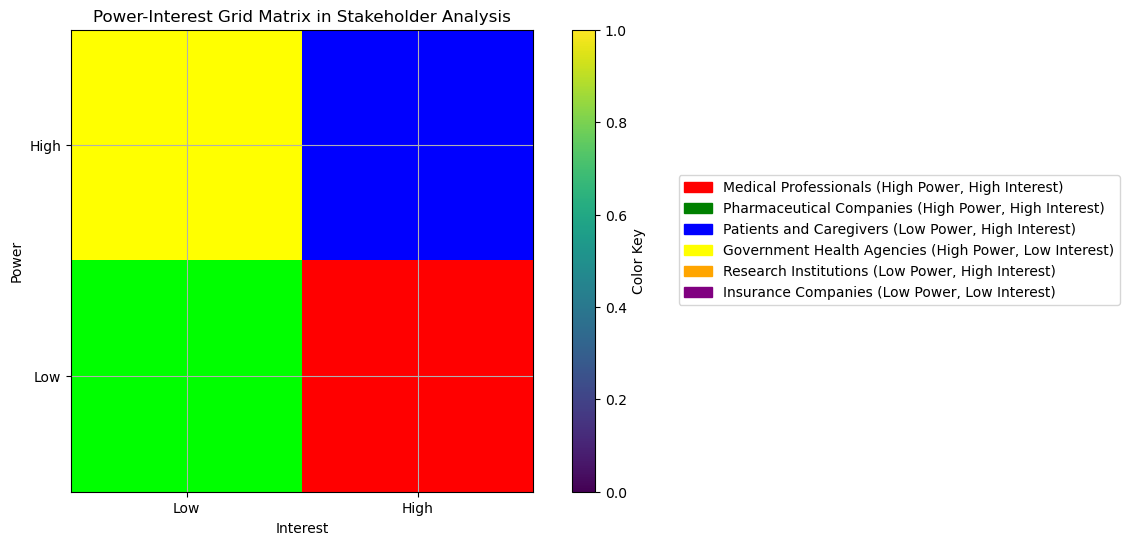

In [54]:
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

# Stakeholder information
stakeholders = {
    "Medical Professionals": {"power": "High", "interest": "High"},
    "Pharmaceutical Companies": {"power": "High", "interest": "High"},
    "Patients and Caregivers": {"power": "Low", "interest": "High"},
    "Government Health Agencies": {"power": "High", "interest": "Low"},
    "Research Institutions": {"power": "Low", "interest": "High"},
    "Insurance Companies": {"power": "Low", "interest": "Low"}
}

#Defining power and interest levels
power_levels = ["Low", "High"]
interest_levels = ["Low", "High"]

#Creating the matrix that will store the color codes
matrix = np.zeros((len(power_levels), len(interest_levels), 3))

#I am assigning colors based on power and interest levels
for stakeholder, info in stakeholders.items():
    power_index = power_levels.index(info["power"])
    interest_index = interest_levels.index(info["interest"])
    color = [1, 0, 0] if (info["power"], info["interest"]) == ("High", "High") else [0, 1, 0] if (info["power"], info["interest"]) == ("High", "Low") else [0, 0, 1] if (info["power"], info["interest"]) == ("Low", "High") else [1, 1, 0]
    matrix[power_index, interest_index] = color

#legend labels
legend_labels = [f"{stakeholder} ({info['power']} Power, {info['interest']} Interest)" for stakeholder, info in stakeholders.items()]

# Plotting the power-interest grid matrix
plt.figure(figsize=(10, 6), facecolor='white', edgecolor='black')
plt.imshow(matrix, extent=(0, len(interest_levels), 0, len(power_levels)), interpolation='nearest')
plt.xticks(np.arange(len(interest_levels)) + 0.5, interest_levels)
plt.yticks(np.arange(len(power_levels)) + 0.5, power_levels)
plt.xlabel('Interest')
plt.ylabel('Power')
plt.title('Power-Interest Grid Matrix in Stakeholder Analysis')
plt.grid(True)
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='red', label=legend_labels[0]),
                     plt.Rectangle((0, 0), 1, 1, color='green', label=legend_labels[1]),
                     plt.Rectangle((0, 0), 1, 1, color='blue', label=legend_labels[2]),                #legend labels + the name of the stakeholders and their power and interest levels
                     plt.Rectangle((0, 0), 1, 1, color='yellow', label=legend_labels[3]),
                     plt.Rectangle((0, 0), 1, 1, color='orange', label=legend_labels[4]),
                     plt.Rectangle((0, 0), 1, 1, color='purple', label=legend_labels[5])],
                     loc='upper left', bbox_to_anchor=(1.3,0.7))
plt.colorbar(label='Color Key')
plt.show()


### *Sources*:
- Aldape, K., Brindle, K.M., Chesler, L. et al. Challenges to curing primary brain tumours. Nat Rev Clin Oncol 16, 509–520 (2019). https://doi.org/10.1038/s41571-019-0177-5
- King, S., Exley, J., Parks, S. et al. The use and impact of quality of life assessment tools in clinical care settings for cancer patients, with a particular emphasis on brain cancer: insights from a systematic review and stakeholder consultations. Qual Life Res 25, 2245–2256 (2016). https://doi.org/10.1007/s11136-016-1278-6 

## Task 1.3: The DAPS Diagram

***DAPS DIAGRAM LINK***:
https://github.com/BredaUniversityADSAI/2023-24c-fai1-adsai-MadalinaCarcea221989/blob/f0347aebf3e1bf0f73480bdf00104ee7f66a3c4d/Deliverables/DAPS%20DIAGRAM.png


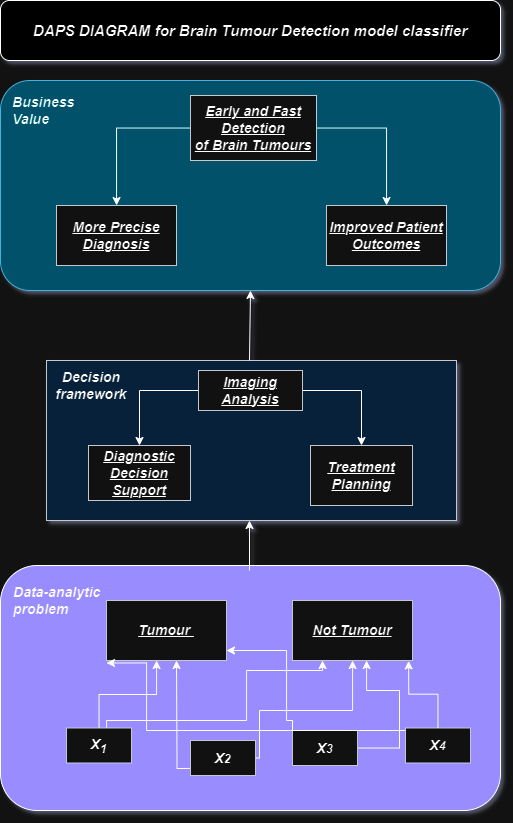

In [55]:
Image(filename= r'.\Daps Diagram v2.png', width = 501 , height = 811)

__1. The data-analytic problem__
- ***Data Sources***:
    - MRI scans, CT scans, PET scans, patient medical records.
- ***Data Elements***:
    - Tumor characteristics (size, location, type), patient demographics, imaging parameters.
- ***Data Processing***:
    - Image segmentation algorithms, feature extraction methods, machine learning models for tumor classification.

__2. The decision framework__
- ***Imaging Analysis***:
    - Focuses on automated analysis of imaging data to identify potential brain tumors and characterize their properties.
- ***Diagnostic Decision Support***:
    - Involves integrating imaging findings with clinical data to aid healthcare professionals in making diagnostic decisions.
- ***Treatment Planning***:
    - Utilizing imaging results to develop personalized treatment plans for patients based on tumor characteristics and medical history.

__3. The business value__
- ***Early Detection***:
    - Leads to improved prognosis and treatment outcomes by detecting brain tumors at early stages.
- ***Precision Diagnosis***:
    - Enhances treatment efficacy and patient care through accurate identification and characterization of brain tumors.
- ***Improved Patient Outcomes***:
    - Results in better survival rates and quality of life for patients by enabling timely interventions based on advanced imaging data.

## Task 1.4: The First Idea

#### The use of advanced imaging techniques such as MRI and CT scans for the early detection and diagnosis of brain tumours has the potential to revolutionize the field. By utilizing these imaging datasets, we can accurately identify abnormalities in brain tissue, which allows for timely intervention and treatment initiation. This innovative approach can detect brain tumours in their early stages, leading to better prognosis, improved treatment outcomes, and ultimately, a higher chance of survival for patients. Adopting this technology for brain tumour detection has the potential to significantly impact patient care, providing hope and better prospects for individuals and their families facing this challenging diagnosis. With such promising results, it is clear that this approach can significantly enhance the detection and treatment of brain tumours, and improve the lives of countless patients.

# Section 2A - Responsible AI (Fairness & Bias, Week 1)

## Task 2.1: Create a Dataset 

### Data set creation

#### Steps for explaining the code below
1. Set the main directory containing subdirectories with images.

2. Initialize an empty list to store image data and filenames.

3. Iterate through each subdirectory:
   - Determine the class label based on the folder name.
   - Collect image files ending with '.png' in the subdirectory.
   - Load each image and store its data, class label, and filename.

4. Convert the collected data into a pandas DataFrame.

5. Display the initial rows of the DataFrame along with the total image count.


In [3]:
main_directory = r".\Brain_Images"
img_data = []

for class_folder in os.listdir(main_directory):
    class_folder_path = os.path.join(main_directory, class_folder)

    if os.path.isdir(class_folder_path):
        class_label = "Tumour" if class_folder.lower() == "tumour" else "Not Tumour"
        print("Class folder:", class_folder)
        print("Class label:", class_label)

        images = [f for f in os.listdir(class_folder_path) if f.endswith('.png')]

        for image_file in images:
            image_path = os.path.join(class_folder_path, image_file)
            image_data = cv2.imread(image_path)
            img_data.append({'class': class_label, 'filename': image_file, 'data': image_data})
            
dataframe = pd.DataFrame(img_data)
print(dataframe.head())
print(f"\nNumber of images: {len(dataframe)}")


Class folder: Not Tumour
Class label: Not Tumour
Class folder: Tumour
Class label: Tumour
        class  filename                                               data
0  Not Tumour     0.png  [[[84, 1, 68], [84, 1, 68], [84, 1, 68], [84, ...
1  Not Tumour    10.png  [[[84, 1, 68], [84, 1, 68], [84, 1, 68], [84, ...
2  Not Tumour   100.png  [[[84, 1, 68], [84, 1, 68], [84, 1, 68], [84, ...
3  Not Tumour   101.png  [[[84, 1, 68], [84, 1, 68], [84, 1, 68], [84, ...
4  Not Tumour  1019.png  [[[84, 1, 68], [84, 1, 68], [84, 1, 68], [84, ...

Number of images: 400


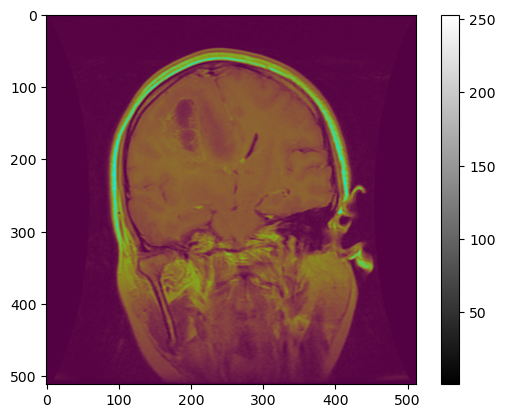

In [4]:
# plot random images from the dataset to check if the data is loaded correctly
plt.imshow(dataframe['data'][random.randint(0, len(dataframe))], cmap='gray')
plt.colorbar()
plt.show()

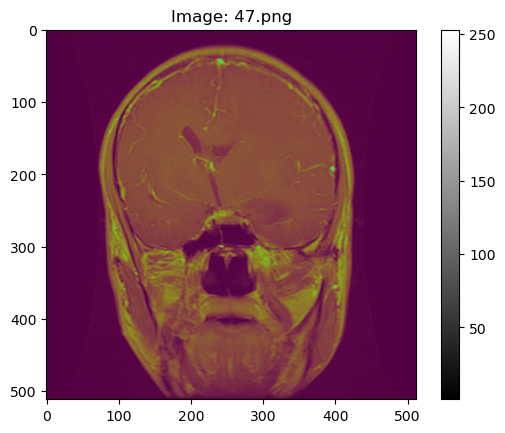

In [5]:
#print specific picture from the data frame 
image_data = dataframe.loc[dataframe['filename'] == '47.png', 'data'].values[0]

# Plot the image
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.title('Image: 47.png')
plt.show()


Pixel values of the first image:
[[[84  1 68]
  [84  1 68]
  [84  1 68]
  ...
  [84  1 68]
  [84  1 68]
  [84  1 68]]

 [[84  1 68]
  [84  1 68]
  [84  1 68]
  ...
  [84  1 68]
  [84  1 68]
  [84  1 68]]

 [[84  1 68]
  [84  1 68]
  [84  1 68]
  ...
  [84  1 68]
  [84  1 68]
  [84  1 68]]

 ...

 [[84  1 68]
  [84  1 68]
  [84  1 68]
  ...
  [84  1 68]
  [84  1 68]
  [84  1 68]]

 [[84  1 68]
  [84  1 68]
  [84  1 68]
  ...
  [84  1 68]
  [84  1 68]
  [84  1 68]]

 [[84  1 68]
  [84  1 68]
  [84  1 68]
  ...
  [84  1 68]
  [84  1 68]
  [84  1 68]]]


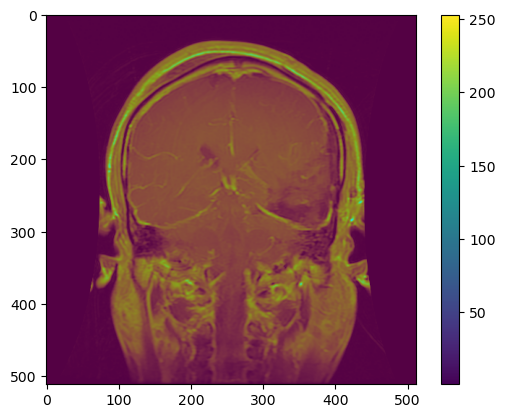

In [6]:
# Print the pixel values of the first image
print("Pixel values of the first image:")
print(dataframe['data'][0])

# Visualize the first image
plt.imshow(dataframe['data'][0])
plt.colorbar()
plt.show()


## Task 2.2: Identify, and Describe Bias

I am unable to think of a way to express the biases in the code itself. However, it's important to note that the images and information surrounding brain tumors are highly sensitive in nature. Thus, the biases would be based on the fact that we cannot identify lots of stuff about the patient, such as the patient's gender, race, and age. We cannot determine whether the patient in the image is a man or a woman, or if the images contain people of different races. Moreover, we cannot accurately determine the patient's age if they are an adult, elderly person, teenager, or child. We can make presumptions, but most of them may not be true.

## Task 2.3: Propose Individual Fairness Method

***Background for the chosen Fairness method:***

*Fairness Through Unawareness* is a preprocessing method that aims to reduce bias by removing or anonymizing sensitive attributes from the dataset. This approach ensures that the model's predictions are not influenced by factors such as race, gender, or age. 

***The proposed Method:***

In our medical dataset, we do not have any patient demographic information, including race, gender, or age. Therefore, Fairness Through Unawareness is a suitable method for addressing bias related to these attributes. By removing any potentially identifying information from the dataset, we aim to ensure that our model's predictions are solely based on medical features relevant to the classification task, such as tumor characteristics, location, and growth rate. 

***Implementation:***

To implement *Fairness Through Unawareness*, we will preprocess the dataset by removing any columns or features that contain sensitive attributes. This includes demographic information such as race, gender, and age, as well as any other potentially identifying information. 

***Justification:***

*Fairness Through Unawareness* is an effective method for our dataset because it ensures that our model's predictions are based solely on relevant medical features. By removing sensitive attributes, we mitigate the risk of bias in our classification task, promoting fairness and equity in our predictions. 

***Ethical Considerations:***

This approach prioritizes patient privacy and confidentiality by removing potentially identifying information from the dataset. It also aligns with ethical principles of fairness and equity by ensuring that our model's predictions are not influenced by sensitive attributes. Impact Evaluation: We will evaluate the impact of Fairness Through Unawareness on our model's performance, including accuracy and fairness metrics. By comparing results before and after preprocessing, we can assess the effectiveness of this method in mitigating bias while maintaining predictive performance.

***Conclusion:***

##### To conclude, the data set I possess does not contain any patient information. Thus, I do not have to regulate it through any code. My CT scans and MRIs exclusively comprise images of the head and brain, making it challenging to assume the gender, race, or age of the patient. This ensures anonymity and eliminates any potential for bias.

## Task 2.4: Create Infographic; Group Fairness Metrics

INFOGRAPHIC LINK:
https://github.com/BredaUniversityADSAI/2023-24c-fai1-adsai-MadalinaCarcea221989/blob/f078d573c188a3e630c563e4254582fcee19a7c4/Deliverables/Group%20Fairness%20in%20Machine%20Learning%20Infographic.pdf

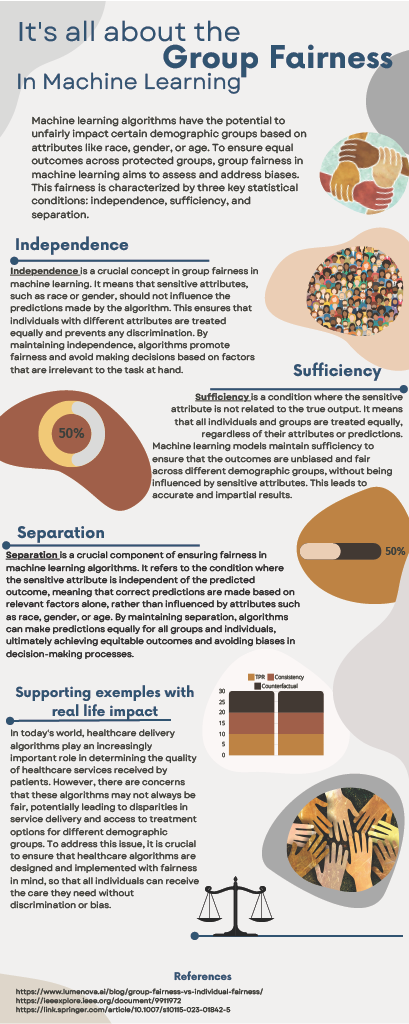

In [60]:
Image(filename= r'.\Infographic Group Fairness.png', width= 409, height=1024, embed=True , retina = True, unconfined = True)

## ***Personal-Review on Infographic***

### 1. ***Strengths***
- Personal Review
- Strenghts: I made sure to give good explainations to our group fairness metrics method , I illustrated with graphs and visuals that help with the engaging part of the infographic. 

### 2. ***Areas for Improvement***
- Personal Review
- Areas for improvement: I would have loved to have a specific use case , or make it specificly for my idea. The best improvement would be a premium subscription to this design tools, thus it gives you more visuals and insights for the main idea.

### 3. ***Next Steps for Improvement***
- Imagine the power of sharing real-life scenarios that showcase the importance of group fairness in machine learning. These examples can help us connect with the content in a meaningful way and inspire us to take action. By providing practical strategies and actionable steps for mitigating bias in machine learning models, we can empower ourselves and others to make a positive impact. Let's take responsibility and make a difference together.

### 4. ***Reflection***
- From my perspective, the infographic does a commendable job of emphasizing group fairness in machine learning. The clarity around various group fairness metrics is valuable. However, incorporating more detailed examples and ensuring design consistency—like maintaining font styles and colors—would elevate its overall impact.


## ***Peer-Review on Infographic***

### 1. ***Strengths***

- Peer Reviewer: Tudor Pitulice 234803
- Strengths: Clear and concise explanation of group fairness metrics, effective use of visual elements to illustrate concepts, engaging use case or case studies.

### 2. ***Areas for Improvement***

- Peer Reviewer: Tudor Pitulice 234803
- Areas for Improvement: More detailed explanation of real-world impacts and best practices, ensuring consistency in design elements throughout the infographic.

### 3. ***Next Steps for Improvement***

Actionable Steps:
- Expand on the section discussing real-world impacts by providing specific examples or case studies.
- Enhance the best practices section by including actionable steps or strategies for mitigating bias in machine learning models.
- Ensure consistency in design elements such as font styles, colors, and layout throughout the infographic.

### 4. ***Reflection***

- Reflection: The infographic effectively communicates the importance of group fairness in machine learning and provides a clear overview of various group fairness metrics. Feedback from the peer reviewer highlighted areas for improvement, particularly in providing more detailed examples and ensuring consistency in design elements. Incorporating these suggestions will enhance the overall effectiveness of the infographic in conveying the key concepts of group fairness.


## Task 2.5: Write Python Function; Group Fairness Taxonomy

### Link to the Jupyter notebook that contains the 2.5 Task : https://github.com/BredaUniversityADSAI/2023-24c-fai1-adsai-MadalinaCarcea221989/blob/d8f9409333fd1c4ca399c109f6be26f313a74bbb/Deliverables/Task%202.5.ipynb


# Section 2B - Responsible AI (Transparency & Interpretability, Week 6)

## Task 2.6: Apply One/Multiple Explainable AI Method(s) to the Image Classifier

### FIRST METHOD -SALIENCY MAP

This code cell loads, resizes, preprocesses, and converts an image to a tensor. Then, it loads my first custom-trained CNN model and performs a forward pass to obtain predicted probabilities. Using GradientTape,I compute the normalized gradients to generate a saliency map that highlights regions contributing to the predicted class. Finally, the original image and the saliency map are visualized side by side, but because the initial images are redish , the output image made by the saliency map has multipe red pixels with some yellow pixels on it also.

Original Image Shape: (512, 512, 3)
Resized Image Shape: (256, 256, 3)
Preprocessed Image Shape: (256, 256, 3)
Image Tensor Shape: (256, 256, 3)
Batched Image Shape: (1, 256, 256, 3)
1/1 [==============================] - 0s 44ms/step


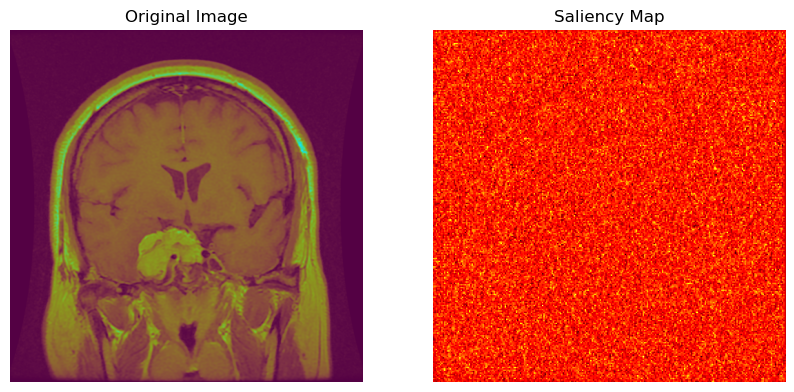

In [108]:
# Load the image and preprocess
image_path = r'.\Image_for_Task_2.6.png'
if os.path.exists(image_path):
    image = plt.imread(image_path)
    print("Original Image Shape:", image.shape)
    image_resized = tf.image.resize(image, (256, 256))  # Resize to match model input size
    print("Resized Image Shape:", image_resized.shape)
    image_preprocessed  = tf.keras.applications.resnet50.preprocess_input(image_resized)
    print("Preprocessed Image Shape:", image_preprocessed.shape)
    #Convertion to tensor 
    image_tensor = tf.convert_to_tensor(image_preprocessed, dtype=tf.float32)
    print("Image Tensor Shape:", image_tensor.shape)
    # Add batch dimension, if not it throws a value error about the input shape
    image_batched = tf.expand_dims(image_tensor, axis=0) 
    print("Batched Image Shape:", image_batched.shape)
    
    
else:
    print("Image file not found.")

#load model 1 from CNN
model = tf.keras.models.load_model(r'.\Iteration_1.h5')

# Forward pass to obtain predicted probabilities
pred_probs = model.predict(image_batched)

# Get the index of the predicted class
predicted_class = np.argmax(pred_probs)

# Compute gradients
with tf.GradientTape() as tape:
    tape.watch(image_batched)
    pred_saliency = model(image_batched)
    target_class_output = pred_saliency[:, predicted_class]

# Get the gradients
gradients = tape.gradient(target_class_output, image_batched)

# Normalize gradients
normalized_gradients = gradients / (tf.sqrt(tf.reduce_mean(tf.square(gradients))) + 1e-5)

# Generate saliency map
saliency_map = tf.reduce_max(normalized_gradients, axis=-1)
# saliency_map = 1 - saliency_map
# Normalize the saliency map to have values between 0 and 1 for visualization purposes,
#in order to fix this warning : -> Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
saliency_map_normalized = saliency_map / tf.reduce_max(saliency_map)

# Visualize saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map_normalized[0], cmap='hot')
plt.title('Saliency Map')
plt.axis('off')

plt.show()

### SECOND METHOD - LIME

This code block uses LIME to explain predictions made by my first iteration of a custom-trained model on an image. It checks if the image file exists, resizes the image to match the model's input size, and converts it to a NumPy array. The model is loaded using Keras' load_model() function, and an instance of the LIME explainer is created to explain the model's predictions. Finally, the explanation provided by LIME is visualized using Matplotlib.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


  1%|▏         | 14/1000 [00:00<00:07, 139.28it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 30/1000 [00:00<00:08, 116.01it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 50/1000 [00:00<00:07, 127.63it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 70/1000 [00:00<00:07, 131.09it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 90/1000 [00:00<00:06, 133.77it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 110/1000 [00:00<00:06, 129.64it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 130/1000 [00:00<00:06, 133.93it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 150/1000 [00:01<00:06, 134.59it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 170/1000 [00:01<00:06, 132.64it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 190/1000 [00:01<00:06, 134.51it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 210/1000 [00:01<00:05, 134.56it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 230/1000 [00:01<00:05, 135.84it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 250/1000 [00:01<00:05, 133.83it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 270/1000 [00:02<00:05, 135.59it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 290/1000 [00:02<00:05, 137.27it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 310/1000 [00:02<00:05, 134.53it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 330/1000 [00:02<00:04, 136.92it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 350/1000 [00:02<00:04, 138.50it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 370/1000 [00:02<00:04, 140.36it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 390/1000 [00:02<00:04, 141.54it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 410/1000 [00:03<00:04, 136.96it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 430/1000 [00:03<00:04, 139.10it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 450/1000 [00:03<00:03, 138.89it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 470/1000 [00:03<00:03, 139.45it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 490/1000 [00:03<00:03, 137.98it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 510/1000 [00:03<00:03, 140.57it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 530/1000 [00:03<00:03, 141.99it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 550/1000 [00:04<00:03, 141.04it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 570/1000 [00:04<00:03, 142.94it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 590/1000 [00:04<00:02, 142.15it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 610/1000 [00:04<00:02, 138.80it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 630/1000 [00:04<00:02, 140.42it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 650/1000 [00:04<00:02, 141.13it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 670/1000 [00:04<00:02, 138.83it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 690/1000 [00:05<00:02, 138.55it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 710/1000 [00:05<00:02, 140.85it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 730/1000 [00:05<00:01, 139.22it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 750/1000 [00:05<00:01, 141.47it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 770/1000 [00:05<00:01, 139.65it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 790/1000 [00:05<00:01, 139.70it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 810/1000 [00:05<00:01, 141.07it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 830/1000 [00:06<00:01, 138.07it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 850/1000 [00:06<00:01, 140.20it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 870/1000 [00:06<00:00, 137.92it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 890/1000 [00:06<00:00, 139.65it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 910/1000 [00:06<00:00, 141.34it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 930/1000 [00:06<00:00, 139.41it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 950/1000 [00:06<00:00, 141.76it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 970/1000 [00:07<00:00, 136.26it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 990/1000 [00:07<00:00, 138.89it/s]

1/1 [==============================] - 0s 35ms/step


100%|██████████| 1000/1000 [00:07<00:00, 137.97it/s]


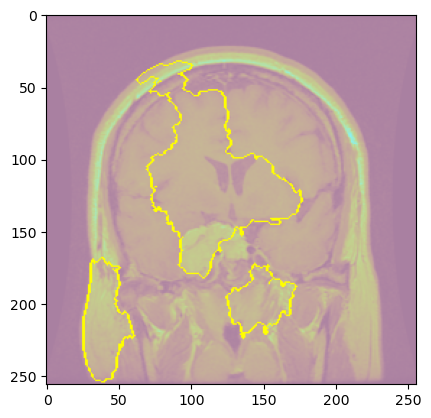

In [111]:
image_path = r'.\Image_for_Task_2.6.png'
if os.path.exists(image_path):
    image = plt.imread(image_path)
    
    # Resize the image to match the input size of your custom model
    resized_image = tf.image.resize(image, (256, 256))
    resized_image_np = resized_image.numpy()

    # Perform any other necessary preprocessing steps
    
    # Load your custom-trained model
    model = tf.keras.models.load_model(r'.\Iteration_1.h5')

    # Create LIME explainer
    explainer = lime_image.LimeImageExplainer()

    # Explain predictions using LIME
    explanation = explainer.explain_instance(resized_image_np, 
                                             model.predict, 
                                             top_labels=1, 
                                             hide_color=0, 
                                             num_samples=1000)

    # Visualize explanation
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                                 positive_only=True, 
                                                 num_features=5, 
                                                 hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()
else:
    print("Image file not found.")

# Section 3 - Neural Networks and Deep Learning (Weeks 2 to 5)

## Task 3.1: Baselines

### 1. Random Guess Accuracy

In [63]:
# random guess accuracy 
random_guess_accuracy = 1 / len(dataframe['class'].unique())
print(f"Random guess accuracy: {random_guess_accuracy:.2%}")


Random guess accuracy: 50.00%


In the above code it can be easily observed that , because my model has only two classes which makes it binary , we have only two choices to make when we get one of the images from the data set. The questions are is there a brain tumour or not , in this image? the only two possible answears are yes or no. Thus, the random guess accuracy is 50%.

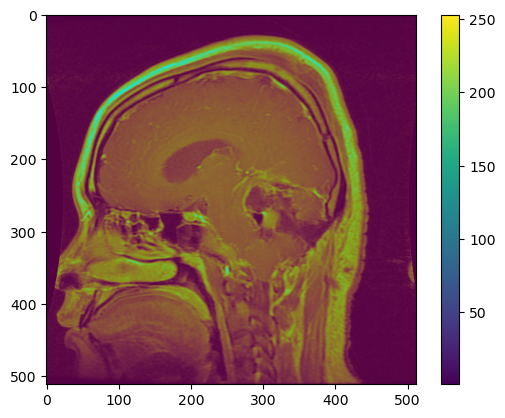

In [64]:
#Plot a random image from the dataset to showcase the random guess accuracy
plt.imshow(dataframe['data'][random.randint(0, len(dataframe))])
plt.colorbar()
plt.show()

### 2. Human-Level Performance Accuracy

Brain tumor detection and diagnosis is a complex task that relies on the expertise of medical professionals. Establishing Human-Level Performance (HLP) accuracy for AI systems can gauge their proficiency in replicating or surpassing human-level capabilities. Surpassing HLP can enhance diagnostic speed, accuracy, and consistency, leading to earlier detection, improved outcomes, and efficient healthcare resource utilization. Tracking progress towards HLP is a vital measure of technological advancement in medical imaging and diagnostics, driving innovation and enhancing healthcare services.
When my peers filled out the form that I created, I received varying responses regarding the images. Specifically, there were images of the brain with lines and outlines that caused confusion as to whether a tumor was present or not. Human-level accuracy can easily detect tumors when they are clear and easily visible. However, if the tumor is small or elusive, it becomes more challenging to detect.

In [65]:
C = 88 # count of correct predictions
N = 120 # total number of predictions

Human_Level_accuracy = C / N
print(f"Human Level accuracy: {Human_Level_accuracy:.2%}")

Human Level accuracy: 73.33%


### 3. Basic Multilayer Perceptron Accuracy

The code below , is related to resizing the images, splitting the dataset into training, validation and test sets.

In [7]:
# Resizing images to a consistent shape
def resize(image, target_shape):
    return transform.resize(image, target_shape, mode='constant', anti_aliasing=True)
target_shape = (256, 256)
df_MLP = dataframe.copy()

# Resize images and create a new column 'resized_images'
df_MLP['resized_images'] = df_MLP['data'].apply(lambda x: cv2.resize(x, target_shape,  interpolation = cv2.INTER_LINEAR))

# Extract the resized images from the DataFrame
X = np.array(df_MLP['resized_images'].tolist())
y = df_MLP['class']

# Split the data
X_train_MLP, X_MLP, y_train_MLP, y_MLP = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the remaining data into validation and test sets
X_val_MLP, X_test_MLP, y_val_MLP, y_test_MLP = train_test_split(X_MLP, y_MLP, test_size=0.3, random_state=42)

# Additional preprocessing
X_train_MLP = X_train_MLP.astype('float32') / 255.0
X_test_MLP = X_test_MLP.astype('float32') / 255.0
X_val_MLP = X_val_MLP.astype('float32') / 255.0
X_MLP = X_MLP.astype('float32') / 255.0

print("Train set shape:", X_train_MLP.shape, y_train_MLP.shape)
print("Validation set shape:", X_val_MLP.shape, y_test_MLP.shape)
print("Test set shape:", X_test_MLP.shape, y_test_MLP.shape)
print("Remaining set shape:", X_MLP.shape, y_MLP.shape)


Train set shape: (280, 256, 256, 3) (280,)
Validation set shape: (84, 256, 256, 3) (36,)
Test set shape: (36, 256, 256, 3) (36,)
Remaining set shape: (120, 256, 256, 3) (120,)


In [8]:
# Check the range of pixel values in the data
print("Pixel value range in X_train: ", np.min(X_train_MLP), "-", np.max(X_train_MLP))

Pixel value range in X_train:  0.003921569 - 0.98039216


In [13]:
# Reshaped input data for MLP
X_train_flatten = X_train_MLP.reshape(X_train_MLP.shape[0], -1)
X_val_flatten = X_val_MLP.reshape(X_val_MLP.shape[0], -1)
X_test_flatten = X_test_MLP.reshape(X_test_MLP.shape[0], -1)

# One-hot encoding the labels
encoder = LabelEncoder()
y_train_MLP_encoded = encoder.fit_transform(y_train_MLP)
y_val_MLP_encoded = encoder.transform(y_val_MLP)
y_test_MLP_encoded = encoder.transform(y_test_MLP)

In [14]:
# Building the model
model_MLP = Sequential()
model_MLP.add(Dense(128, activation='relu', input_shape=(256 * 256 * 3,)))  # Input shape matches the flattened size
model_MLP.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Compiling the model
optimizer = Adam(learning_rate=0.001)
model_MLP.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model_MLP.fit(X_train_flatten, y_train_MLP_encoded, batch_size=32, epochs=10,
                    validation_data=(X_val_flatten, y_val_MLP_encoded),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluating the model
test_loss, test_acc = model_MLP.evaluate(X_test_flatten, y_test_MLP_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)



Epoch 1/10
9/9 [==============================] - 1s 51ms/step - loss: 23.6055 - accuracy: 0.5500 - val_loss: 13.1627 - val_accuracy: 0.4881
Epoch 2/10
9/9 [==============================] - 0s 47ms/step - loss: 7.0606 - accuracy: 0.6357 - val_loss: 7.4682 - val_accuracy: 0.5119
Epoch 3/10
9/9 [==============================] - 0s 47ms/step - loss: 3.0746 - accuracy: 0.7500 - val_loss: 4.7855 - val_accuracy: 0.6905
Epoch 4/10
9/9 [==============================] - 0s 48ms/step - loss: 1.5628 - accuracy: 0.8214 - val_loss: 3.0655 - val_accuracy: 0.7976
Epoch 5/10
9/9 [==============================] - 0s 48ms/step - loss: 0.7815 - accuracy: 0.8679 - val_loss: 1.7738 - val_accuracy: 0.8333
Epoch 6/10
9/9 [==============================] - 0s 47ms/step - loss: 0.3815 - accuracy: 0.9429 - val_loss: 1.7292 - val_accuracy: 0.8214
Epoch 7/10
9/9 [==============================] - 0s 48ms/step - loss: 0.3088 - accuracy: 0.9464 - val_loss: 1.5372 - val_accuracy: 0.8214
Epoch 8/10
9/9 [=========

In [15]:
model_MLP.save('./Iteration_MLP.h5')

In [16]:
loaded_model = load_model('./Iteration_MLP.h5')
loaded_model.summary()
print("Model loaded successfully!")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               25165952  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,166,081
Trainable params: 25,166,081
Non-trainable params: 0
_________________________________________________________________
Model loaded successfully!


In [17]:
print("X_train_flatten shape:", X_train_flatten.shape)
print("X_val_flatten shape:", X_val_flatten.shape)
print("X_test_flatten shape:", X_test_flatten.shape)


X_train_flatten shape: (280, 196608)
X_val_flatten shape: (84, 196608)
X_test_flatten shape: (36, 196608)


In [18]:
print("Train set shape:", X_train_MLP.shape, y_train_MLP.shape)
print("Validation set shape:", X_val_MLP.shape, y_val_MLP.shape)
print("Test set shape:", X_test_MLP.shape, y_test_MLP.shape)

Train set shape: (280, 256, 256, 3) (280,)
Validation set shape: (84, 256, 256, 3) (84,)
Test set shape: (36, 256, 256, 3) (36,)


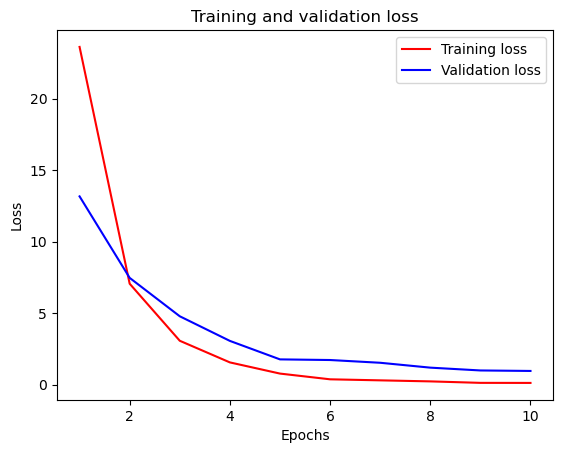

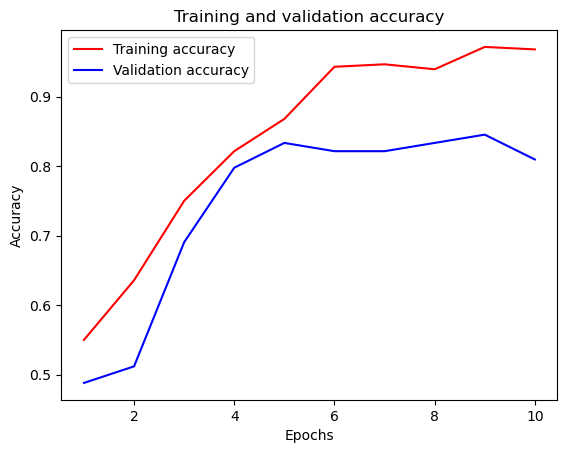

In [19]:
# Plotting the training and validation loss with different colors
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')  # Red color for training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Blue color for validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotting the training and validation accuracy with different colors
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training accuracy')  # Red color for training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  # Blue color for validation accuracy
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Task 3.2 Preprocessing

### Iteration 1

The code applies blur , then prepares new lists for training, validation and testing data by copying the original images, setting the stage for applying the Gaussian blur to the images if needed. I also use the One-hot encoding which converts categorical labels into numerical values, for the algorithm ,enabeling accurate model training and evaluation. 

In [20]:
# Resizing images to a consistent shape
def resize(image, target_shape):
    return transform.resize(image, target_shape, mode='constant', anti_aliasing=True)
target_shape = (256, 256)
df = dataframe.copy()

# # Resize images and create a new column 'resized_images'
df['resized_images'] = df['data'].apply(lambda x: cv2.resize(x, target_shape,  interpolation = cv2.INTER_LINEAR))

# Extract the resized images from the DataFrame
X1 = np.array(df['resized_images'].tolist())
y1 = df['class']
# X_resized = np.array([resize(image, target_shape) for image in df['data']])

# Split the data
X_train, X_remaining, y_train, y_remaining = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Further split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=42)

# Additional preprocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_remaining = X_remaining.astype('float32') / 255.0

# One-hot encoding the labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)

# Reshaped input data for first model
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_val_flatten = X_val.reshape(X_val.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Define a function to apply Gaussian blur to images
def apply_gaussian_blur(image, kernel_size=(3, 3)):
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

X_train_blurred = [image for image in X_train]
X_val_blurred = [image for image in X_val]
X_test_blurred = [image for image in X_test]



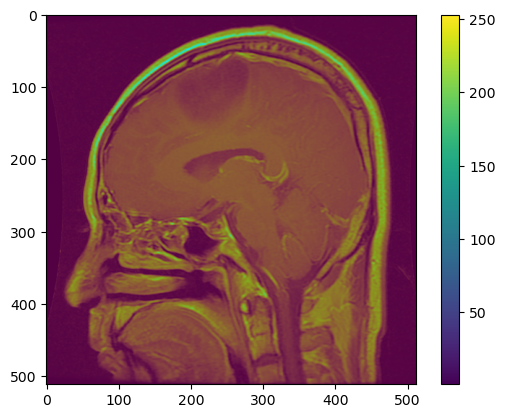

In [21]:
plt.imshow(df['data'][random.randint(0, len(dataframe))])
plt.colorbar()
plt.show()

### Iteration 2

The code resizes images in the dataframe to a target shape of 256x256 pixels and normalizes the pixel values.
It then splits the data into training, validation, and test sets for model training and evaluation, ensuring a proper distribution of data for effective machine learning and CNN tasks.

In [22]:
# #image resizing
target_shape = (256, 256)
df2 = dataframe.copy()
df2['resized_images'] = df2['data'].apply(lambda x: cv2.resize(x, target_shape, interpolation = cv2.INTER_LINEAR))
X2 = np.array(df2['resized_images'].tolist()) / 255
y2 = df2['class']

#splitting the data
X_train_2, X_remaining_2, y_train_2, y_remaining_2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=42)

# One-hot encoding the labels
encoder = LabelEncoder()
y_train_encoded_2 = encoder.fit_transform(y_train_2)
y_val_encoded_2 = encoder.transform(y_val_2)
y_test_encoded_2 = encoder.transform(y_test_2)

### Iteration 3

The code provided includes the implementation of the LabelEncoder class, which is a part of the scikit-learn library. The LabelEncoder is used to encode target labels with values between 0 and 1

In [23]:
X_train_3 = X_train_2[:, :, :, :3]
X_test_3 = X_test_2[:, :, :, :3]
X_remaining_3 = X_remaining_2[:, :, :, :3]
X_val_3 = X_val_2[:, :, :, :3]

y_train_3 = y_train_2
y_val_3 = y_val_2
y_test_3 = y_test_2

# One-hot encoding the labels
encoder = LabelEncoder()
y_train_encoded_3 = encoder.fit_transform(y_train_3)
y_val_encoded_3 = encoder.transform(y_val_3)
y_test_encoded_3 = encoder.transform(y_test_3)


# Define batch size
batch_size = 16


### Iteration 4


More preprocessing , labelEncoder class, data augumentation , reshaping values ,etc 

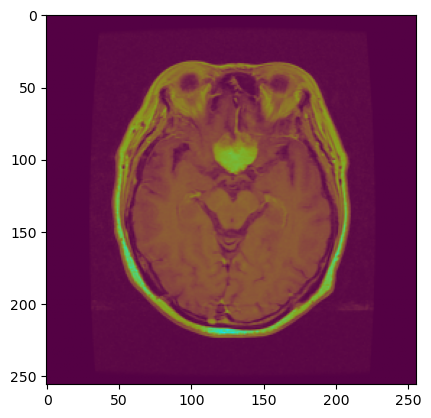

In [24]:
X_train_4 = X_train_3[:, :, :, :3]
X_test_4 = X_test_3[:, :, :, :3]
X_remaining_4 = X_remaining_3[:, :, :, :3]
X_val_4 = X_val_3[:, :, :, :3]

y_train_4 = y_train_3
y_val_4 = y_val_3
y_test_4 = y_test_3

# One-hot encoding the labels
encoder = LabelEncoder()
y_train_encoded_4 = encoder.fit_transform(y_train_4)
y_val_encoded_4 = encoder.transform(y_val_4)
y_test_encoded_4 = encoder.transform(y_test_4)

# Create image data generators with rescaling and augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.0005,
    height_shift_range=0.0005,
    shear_range=0.005,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

plt.imshow(X_train_4[234])
plt.show()

# Define batch size
batch_size = 16

y_train_encoded_4_reshaped = y_train_encoded_4.reshape(-1, 1)
y_val_encoded_4_reshaped = y_val_encoded_4.reshape(-1, 1)
y_test_encoded_4_reshaped = y_test_encoded_4.reshape(-1, 1)


# Flow training images in batches using train_datagen generator with augmentation
train_generator_2 = train_datagen.flow(X_train_4, y_train_encoded_4_reshaped, batch_size=batch_size)
# Flow validation images in batches using val_datagen generator
validation_generator_2 = val_datagen.flow(X_val_4, y_val_encoded_4_reshaped, batch_size=batch_size)
# Flow test images in batches using test_datagen generator
test_generator_2 = test_datagen.flow(X_test_4, y_test_encoded_4, batch_size=batch_size)

# Directory to save augmented images
augmented_images_dir = "Augmented_images"
if not os.path.exists(augmented_images_dir):
    os.makedirs(augmented_images_dir)
    print(f"Created directory: {augmented_images_dir}")

# Number of augmented images to generate + existing images count + remaining images to generate so it matches the total of 1000
num_augmented_images = 2000  
existing_images_count = len(os.listdir(augmented_images_dir))
remaining_images_to_generate = num_augmented_images - existing_images_count

# Generate and save augmented images
total_generated_images = 0
for i, (data_batch, labels_batch) in enumerate(train_generator_2):
    if remaining_images_to_generate <= 0 or total_generated_images >= num_augmented_images:
        break
    for j in range(data_batch.shape[0]):
        if remaining_images_to_generate <= 0 or total_generated_images >= num_augmented_images:
            break
        #stops the loop if the remaining images to generate is less than 0 
        #Prevents the loop from creating more images than needed everytime you run the code 
        image = data_batch[j]
        label = labels_batch[j]

        #No need for debugging the RGB/BGR channels and pixel values- comment out the print statement
        # Print image shape and range for debugging the RGB/BGR channels and pixel values
        # print(f"Image shape: {image.shape}, min: {image.min()}, max: {image.max()}")

        #Ensuring pixel values are in the correct range (0 to 255)
        image = (image * 255).astype('uint8')
        
        # Convert the image to BGR format before saving with cv2
        image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Save the image with a unique filename based on index and label
        filename = f"augmented_image_{i * batch_size + j}.jpg"
        filepath = os.path.join(augmented_images_dir, filename)
        
        # Save the image to the directory
        cv2.imwrite(filepath, image_bgr)
        total_generated_images += 1
    
    if total_generated_images >= num_augmented_images:
        break    
    

### Iteration 5

Really similar to the Iteration 4 code

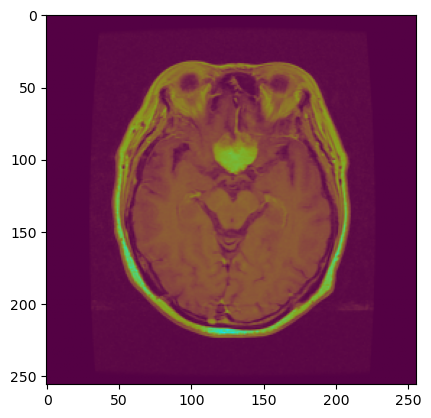

In [25]:
X_train_5 = X_train_4[:, :, :, :3]
X_test_5 = X_test_4[:, :, :, :3]
X_remaining_5 = X_remaining_4[:, :, :, :3]
X_val_5 = X_val_4[:, :, :, :3]

y_train_5 = y_train_4
y_val_5 = y_val_4
y_test_5 = y_test_4

# One-hot encoding the labels
encoder = LabelEncoder()
y_train_encoded_5 = encoder.fit_transform(y_train_5)
y_val_encoded_5 = encoder.transform(y_val_5)
y_test_encoded_5 = encoder.transform(y_test_5)

# Create image data generators with rescaling and augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.0005,
    height_shift_range=0.0005,
    shear_range=0.005,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

plt.imshow(X_train_5[234])
plt.show()

# Define batch size
batch_size = 16

# Flow training images in batches using train_datagen generator with augmentation
train_generator = train_datagen.flow(X_train_5, y_train_encoded_5, batch_size=batch_size)
# Flow validation images in batches using val_datagen generator
validation_generator = val_datagen.flow(X_val_5, y_val_encoded_5, batch_size=batch_size)
# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow(X_test_5, y_test_encoded_5, batch_size=batch_size)

# Directory to save augmented images
augmented_images_dir = "Augmented_images"
if not os.path.exists(augmented_images_dir):
    os.makedirs(augmented_images_dir)
    print(f"Created directory: {augmented_images_dir}")

# Number of augmented images to generate + existing images count + remaining images to generate so it matches the total of 1000
num_augmented_images = 2000  
existing_images_count = len(os.listdir(augmented_images_dir))
remaining_images_to_generate = num_augmented_images - existing_images_count

# Generate and save augmented images
total_generated_images = 0
for i, (data_batch, labels_batch) in enumerate(train_generator):
    if remaining_images_to_generate <= 0 or total_generated_images >= num_augmented_images:
        break
    for j in range(data_batch.shape[0]):
        if remaining_images_to_generate <= 0 or total_generated_images >= num_augmented_images:
            break
        #stops the loop if the remaining images to generate is less than 0 
        #Prevents the loop from creating more images than needed everytime you run the code 
        image = data_batch[j]
        label = labels_batch[j]

        #No need for debugging the RGB/BGR channels and pixel values- comment out the print statement
        # Print image shape and range for debugging the RGB/BGR channels and pixel values
        # print(f"Image shape: {image.shape}, min: {image.min()}, max: {image.max()}")

        #Ensuring pixel values are in the correct range (0 to 255)
        image = (image * 255).astype('uint8')
        
        # Convert the image to BGR format before saving with cv2
        image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Save the image with a unique filename based on index and label
        filename = f"augmented_image_{i * batch_size + j}.jpg"
        filepath = os.path.join(augmented_images_dir, filename)
        
        # Save the image to the directory
        cv2.imwrite(filepath, image_bgr)
        total_generated_images += 1
    
    if total_generated_images >= num_augmented_images:
        break    
    

## Task 3.3 CNN Architecture

### Iteration 1

The code converts lists of blurred images and encoded labels into numpy arrays for efficient handling in numerical computations.
It then prints the shapes of these numpy arrays to provide insights into the dimensions of the data arrays, which is crucial for understanding the structure and size of the data being processed.

In [39]:
X_train_blurred_np = np.array(X_train_blurred)
print("X_train_blurred shape:", X_train_blurred_np.shape)
print("X_val_blurred shape:", np.array(X_val_blurred).shape)
print("X_test_blurred shape:", np.array(X_test_blurred).shape)

print("y_train_encoded shape:", np.array(y_train_encoded).shape)
print("y_val_encoded shape:", np.array(y_val_encoded).shape)
print("y_test_encoded shape:", np.array(y_test_encoded).shape)


X_train_blurred shape: (280, 256, 256, 3)
X_val_blurred shape: (84, 256, 256, 3)
X_test_blurred shape: (36, 256, 256, 3)
y_train_encoded shape: (280,)
y_val_encoded shape: (84,)
y_test_encoded shape: (36,)


#### The model consists of a simple architecture with one hidden layer,a maxpooling layer,  a flatten layer, and an output layer for binary classification.
#### ReLU activation is used in the hidden layer, and sigmoid activation in the output layer for binary classification.
#### The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the metric for model evaluation.

In [27]:
# Building the model
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

# Compiling the model
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)


(280, 256, 256, 3)
(84, 256, 256, 3)
(36, 256, 256, 3)
(280,)
(84,)
(36,)


### Iteration 2

In [29]:
X_train_2 = X_train_2[:, :, :, :3]

print("X_train_2" , X_train_2.shape)
print("X_val_2" , X_val_2.shape)
print("X_test_2" , X_test_2.shape)
print("y_train_2" , y_train_2.shape)
print("y_val_2" , y_val_2.shape)
print("y_test_2" , y_test_2.shape)

X_train_2 (280, 256, 256, 3)
X_val_2 (84, 256, 256, 3)
X_test_2 (36, 256, 256, 3)
y_train_2 (280,)
y_val_2 (84,)
y_test_2 (36,)


This code snippet presents a neural network model that suits binary classification tasks. It combines convolutional and dense layers with suitable activations, regularization through dropout, and compilation with Adam optimizer, and binary cross-entropy loss. The model efficiently processes images of size 256x256 with 3 channels. It provides a robust architecture that you can use to train and evaluate my brain tumour binary classification model.

In [53]:
# Define a standard batch size variable
batch_size = 16

# Building the model
model_2 = Sequential()
model_2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(Flatten())
model_2.add(Dropout(0.5))  # Adding dropout for regularization
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='sigmoid'))
model_2.add(Dense(1, activation='sigmoid'))

# Compiling the model and defining the optimizer, loss and learning rate
optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


### Iteration 3

Transfer Learning using Xception , using freezed layers and creating specific functions to train, and evaluate the model

In [32]:
from keras.applications import Xception
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=int(1e-6))
validation_data_3=(X_val_3, y_val_encoded_3)
def build_model_3(input_shape, num_classes):
    # Load pre-trained Xception model (excluding top layers)
    base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classifier layers on top
    model_3 = Sequential()
    model_3.add(base_model)
    model_3.add(GlobalAveragePooling2D())  
    model_3.add(Dense(256, activation='relu')) 
    model_3.add(Dense(256, activation='relu'))  
    model_3.add(BatchNormalization())  
    model_3.add(Dense(256, activation='relu'))  
    model_3.add(Dense(128, activation='relu'))  
    model_3.add(Dropout(0.5))  
    model_3.add(Dense(num_classes, activation='sigmoid'))

    # Compile the model
    model_3.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model_3

def train_model_3(model_3, train_data, validation_data):  
    # Train the model
    history = model_3.fit(train_data[0], train_data[1], epochs=10, batch_size=16, shuffle=False, 
                          validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])
    
    return history

test_generator_1 = test_datagen.flow(X_test_3, y_test_encoded_3, batch_size=batch_size, shuffle=False)

def evaluate_model_3(model_3, test_generator_1):
    # Predict probabilities for test set
    y_pred_proba = model_3.predict(X_test_3)
    # Convert probabilities to binary predictions
    y_pred_binary_3 = (y_pred_proba > 0.4).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded_3, y_pred_binary_3) # type: ignore
    precision = precision_score(y_test_encoded_3, y_pred_binary_3) # type: ignore
    recall = recall_score(y_test_encoded_3, y_pred_binary_3)# type: ignore
    f1 = f1_score(y_test_encoded_3, y_pred_binary_3)# type: ignore
    roc_auc = roc_auc_score(y_test_encoded_3, y_pred_proba)# type: ignore
    
    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test_encoded_3, y_pred_binary_3))
    print("Classification Report:\n", classification_report(y_test_encoded_3, y_pred_binary_3))
    print("ROC AUC Score:", roc_auc_score(y_test_encoded_3, y_pred_binary_3))
    print(X_train_3.shape, X_val_3.shape, X_test_3.shape, y_train_encoded_3.shape, y_val_encoded_3.shape, y_test_encoded_3.shape) # type: ignore
    
    
    conf = ConfusionMatrixDisplay(confusion_matrix(y_test_encoded_3, y_pred_binary_3))
    plt.figure(figsize=(10, 10))
    conf.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    
    return accuracy, precision, recall, f1, roc_auc

model_3 = build_model_3((256, 256, 3), 1)

### Iteration 4

Data augumentation was used for this model , while also having a constantly calculated learning rate. I am doing the functions for the model, train , fine-tuning for performance and evaluation.

In [33]:
from keras.metrics import BinaryAccuracy
from keras.regularizers import l2
from keras.optimizers import SGD

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=int(1e-6))    

def build_model_4(input_shape,num_classes):

    model_4 = Sequential()
    model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model_4.add(MaxPooling2D(pool_size=(2, 2)))
    # model_4.add(BatchNormalization())  
    model_4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
    model_4.add(BatchNormalization())  
    model_4.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
    model_4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001))) 
    model_4.add(Dropout(0.5))  
    model_4.add(Flatten())
    model_4.add(Dense(num_classes, activation='sigmoid'))

    # Compile the model
    # optimizer = SGD(learning_rate=1e-4, momentum=0.9)
    optimizer = Adam(learning_rate=1e-4)
    model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[BinaryAccuracy()])
    
    return model_4

def train_model_4(model_4, train_generator_2, validation_generator_2):   
    
    # Compile the model with a lower learning rate
    model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[BinaryAccuracy()])
    # Train the model
    history = model_4.fit(train_generator_2, epochs=10,batch_size=8,
                          validation_data=validation_generator_2, 
                          callbacks=[reduce_lr])
    
    return history

def fine_tune_model_4(model_4, train_data, validation_data):

    # Recompile the model with a lower learning rate
    model_4.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=[BinaryAccuracy()])

    # Fine-tune the model
    history = model_4.fit(train_generator_2, epochs=15, batch_size=16, 
                        validation_data=validation_generator_2, callbacks=[reduce_lr])
    
    return history


def evaluate_model_4(model_4, test_generator_2):
    # Predict probabilities for test set
    y_pred_proba = model_4.predict(X_test_4)
    # Convert probabilities to binary predictions
    y_pred_binary_4 = (y_pred_proba > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded_4, y_pred_binary_4) # type: ignore
    precision = precision_score(y_test_encoded_4, y_pred_binary_4)# type: ignore
    recall = recall_score(y_test_encoded_4, y_pred_binary_4)# type: ignore
    f1 = f1_score(y_test_encoded_4, y_pred_binary_4)# type: ignore
    roc_auc = roc_auc_score(y_test_encoded_4, y_pred_proba)# type: ignore
    
    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test_encoded_4, y_pred_binary_4))
    print("Classification Report:\n", classification_report(y_test_encoded_4, y_pred_binary_4))
    print("ROC AUC Score:", roc_auc_score(y_test_encoded_4, y_pred_binary_4))
    print(X_train_4.shape, X_val_4.shape, X_test_4.shape, y_train_encoded_4.shape, y_val_encoded_4.shape, y_test_encoded_4.shape) # type: ignore
    
    conf = ConfusionMatrixDisplay(confusion_matrix(y_test_encoded_4, y_pred_binary_4))
    plt.figure(figsize=(10, 10))
    conf.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    
    return accuracy, precision, recall, f1, roc_auc

model_4 = build_model_4((256, 256, 3),1)

In [34]:
print("Shape of X_train_4:", X_train_4.shape)
print("Shape of y_train_encoded_4_reshaped:", y_train_encoded_4_reshaped.shape)

print("Shape of X_val_4:", X_val_4.shape)
print("Shape of y_val_encoded_4_reshaped:", y_val_encoded_4_reshaped.shape)

print("Shape of X_test_4:", X_test_4.shape)
print("Shape of y_test_encoded_4_reshaped:", y_test_encoded_4_reshaped.shape)


Shape of X_train_4: (280, 256, 256, 3)
Shape of y_train_encoded_4_reshaped: (280, 1)
Shape of X_val_4: (84, 256, 256, 3)
Shape of y_val_encoded_4_reshaped: (84, 1)
Shape of X_test_4: (36, 256, 256, 3)
Shape of y_test_encoded_4_reshaped: (36, 1)


### Iteration 5

Data augumentation was used for this model along with Transfer Learning, the pre-trained model VGG16, while also having a constantly calculated learning rate. I am doing the functions for the model, train , fine-tuning for performance and evaluation.

In [35]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=int(1e-6))    
def build_model_5(input_shape, num_classes):
    # Load pre-trained VGG16 model (excluding top layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classifier layers on top
    model_5 = Sequential()
    model_5.add(base_model)
    model_5.add(GlobalAveragePooling2D())  
    model_5.add(Dense(256, activation='relu'))  
    model_5.add(BatchNormalization())  
    model_5.add(Dense(256, activation='relu'))  
    model_5.add(Dense(128, activation='relu'))  
    model_5.add(Dropout(0.5))  
    model_5.add(Dense(num_classes, activation='sigmoid'))

    # Compile the model
    model_5.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model_5

def train_model_5(model_5, train_generator, validation_generator):   
    # Train the model
    history = model_5.fit(train_generator, epochs=10, batch_size=16, 
                        validation_data=validation_generator, callbacks=[reduce_lr])
    
    return history

def fine_tune_model_5(model_5, train_generator, validation_generator):
    # Unfreeze some layers for fine-tuning
    for layer in model_5.layers[-50:]:
        layer.trainable = True

    # Recompile the model with a lower learning rate
    model_5.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

    # Fine-tune the model
    history = model_5.fit(train_generator, epochs=15, batch_size=16, 
                        validation_data=validation_generator, callbacks=[reduce_lr])
    
    return history


def evaluate_model_5(model_5, test_generator):
    # Predict probabilities for test set
    y_pred_proba = model_5.predict(X_test_5)
    # Convert probabilities to binary predictions
    y_pred_binary_5 = (y_pred_proba > 0.4).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded_5, y_pred_binary_5) # type: ignore
    precision = precision_score(y_test_encoded_5, y_pred_binary_5)# type: ignore
    recall = recall_score(y_test_encoded_5, y_pred_binary_5)# type: ignore
    f1 = f1_score(y_test_encoded_5, y_pred_binary_5)# type: ignore
    roc_auc = roc_auc_score(y_test_encoded_5, y_pred_proba)# type: ignore
    
    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test_encoded_5, y_pred_binary_5))
    print("Classification Report:\n", classification_report(y_test_encoded_3, y_pred_binary_5))
    print("ROC AUC Score:", roc_auc_score(y_test_encoded_5, y_pred_binary_5))
    print(X_train_5.shape, X_val_5.shape, X_test_5.shape, y_train_encoded_5.shape, y_val_encoded_5.shape, y_test_encoded_5.shape) # type: ignore
    
    conf = ConfusionMatrixDisplay(confusion_matrix(y_test_encoded_5, y_pred_binary_5))
    plt.figure(figsize=(10, 10))
    conf.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    
    return accuracy, precision, recall, f1, roc_auc

model_5 = build_model_5((256, 256, 3), 1)

## Task 3.4 CNN Training

### Iteration 1

In this part of the code for the first model I am training the basic model. Then, the best model training is saved , loaded and summarized to check the layers, outputs and params.

In [42]:
# Training the model
Version1 = model_1.fit(X_train, y_train_encoded, batch_size=16, shuffle=False, epochs=10, validation_data=(X_val, y_val_encoded))


Epoch 1/10
 1/18 [>.............................] - ETA: 2s - loss: 0.5659 - accuracy: 0.6875

18/18 [==============================] - 3s 152ms/step - loss: 0.5262 - accuracy: 0.7786 - val_loss: 0.5927 - val_accuracy: 0.6548
Epoch 2/10
18/18 [==============================] - 3s 152ms/step - loss: 0.5162 - accuracy: 0.7929 - val_loss: 0.6395 - val_accuracy: 0.5119
Epoch 3/10
18/18 [==============================] - 3s 152ms/step - loss: 0.5063 - accuracy: 0.7821 - val_loss: 0.5805 - val_accuracy: 0.6786
Epoch 4/10
18/18 [==============================] - 3s 156ms/step - loss: 0.4920 - accuracy: 0.8357 - val_loss: 0.5810 - val_accuracy: 0.6905
Epoch 5/10
18/18 [==============================] - 3s 156ms/step - loss: 0.4873 - accuracy: 0.8393 - val_loss: 0.5741 - val_accuracy: 0.7143
Epoch 6/10
18/18 [==============================] - 3s 153ms/step - loss: 0.4819 - accuracy: 0.8393 - val_loss: 0.5690 - val_accuracy: 0.7738
Epoch 7/10
18/18 [==============================] - 3s 153ms/step - loss: 0.4758 - accuracy: 0.8500 - val_loss: 0.5667 - val_accuracy: 0.7738
Epoch 8/10
18/18 

In [43]:
#model_1.save('./Iteration_1.h5')
Iteration_1 = load_model('./Iteration_1.h5')
Iteration_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                33032256  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,033,217
Trainable params: 33,033,217
Non-trainable params: 0
__________________________________________

### Iteration 2

Training the second iteration model , we are giving the specific values for the fitting of the model, by also using data validation and early stopping.The best model is saved, loaded and summarized to see the layers, outputs and params.

In [54]:
# Training the model
Version2 = model_2.fit(X_train_2, y_train_encoded_2, epochs=10, batch_size = 16,shuffle=False, validation_data=(X_val_2, y_val_encoded_2), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/10
18/18 [==============================] - 7s 391ms/step - loss: 0.6862 - accuracy: 0.6143 - val_loss: 0.6355 - val_accuracy: 0.7738
Epoch 2/10
18/18 [==============================] - 7s 402ms/step - loss: 0.5834 - accuracy: 0.8679 - val_loss: 0.5529 - val_accuracy: 0.8690
Epoch 3/10
18/18 [==============================] - 7s 403ms/step - loss: 0.4587 - accuracy: 0.9143 - val_loss: 0.4246 - val_accuracy: 0.8571
Epoch 4/10
18/18 [==============================] - 7s 399ms/step - loss: 0.3136 - accuracy: 0.9321 - val_loss: 0.3750 - val_accuracy: 0.8810
Epoch 5/10
18/18 [==============================] - 7s 399ms/step - loss: 0.2587 - accuracy: 0.9393 - val_loss: 0.3615 - val_accuracy: 0.8929
Epoch 6/10
18/18 [==============================] - 7s 400ms/step - loss: 0.2258 - accuracy: 0.9536 - val_loss: 0.5165 - val_accuracy: 0.7500
Epoch 7/10
18/18 [==============================] - 7s 399ms/step - loss: 0.2320 - accuracy: 0.9464 - val_loss: 0.3411 - val_accuracy: 0.8690
Epoch 

In [55]:
model_2.save('./Iteration_2.h5')

In [56]:
Iteration_2 = load_model('./Iteration_2.h5')
Iteration_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 flatten_8 (Flatten)         (None, 500000)            0         
                                                                 
 dropout_7 (Dropout)         (None, 500000)            0         
                                                                 
 dense_36 (Dense)            (None, 64)                32000064  
                                                     

### Iteration 3

In the third iteration I use Transfer Learning to optimize the model. The choosen application from keras is Xception because it has a high accuracy and less size than the others that i tried e.g. VGG16 or MobileNet. The accuracy with this model is going up , having a small value as loss.

In [57]:
# Training the model
# Version3 = model_3.fit(X_train_3, y_train_encoded_3, epochs=10, batch_size = 16,shuffle=False, validation_data=(X_val_3, y_val_encoded_3), callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])
history = train_model_3(model_3, (X_train_3, y_train_encoded_3), (X_val_3, y_val_encoded_3))


Epoch 1/10


18/18 [==============================] - 12s 607ms/step - loss: 0.7233 - accuracy: 0.5393 - val_loss: 0.6753 - val_accuracy: 0.6667
Epoch 2/10
18/18 [==============================] - 11s 644ms/step - loss: 0.5109 - accuracy: 0.7429 - val_loss: 0.6586 - val_accuracy: 0.6667
Epoch 3/10
18/18 [==============================] - 12s 656ms/step - loss: 0.4089 - accuracy: 0.8214 - val_loss: 0.6407 - val_accuracy: 0.6786
Epoch 4/10
18/18 [==============================] - 13s 749ms/step - loss: 0.3082 - accuracy: 0.9071 - val_loss: 0.6228 - val_accuracy: 0.7143
Epoch 5/10
18/18 [==============================] - 13s 740ms/step - loss: 0.2513 - accuracy: 0.9429 - val_loss: 0.6027 - val_accuracy: 0.7619
Epoch 6/10
18/18 [==============================] - 14s 763ms/step - loss: 0.2294 - accuracy: 0.9357 - val_loss: 0.5825 - val_accuracy: 0.7738
Epoch 7/10
18/18 [==============================] - 14s 777ms/step - loss: 0.1839 - accuracy: 0.9714 - val_loss: 0.5578 - val_accuracy: 0.7976
Epoch 8/10

In [58]:
model_3.save('./Iteration_3.h5')

In [59]:
Iteration_3 = load_model('./Iteration_3.h5')
Iteration_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_11 (Dense)            (None, 256)               524544    
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 256)              

### Iteration 4


In the forth iteration I use Data Augmentation in order to give the model more images to learn from. I am creating 2000 images, train and fine tune the model achieving a value of 97.14% in the binary accuracy. unfortunatly, the value for the val_binary_accuracy doesn't change much ending up being a bit better than a random guess.

In [60]:
# Training the model
history = train_model_4(model_4, train_generator_2, validation_generator_2)
fine_tune_model_4 = fine_tune_model_4(model_4,train_generator_2, validation_generator_2)


Epoch 1/10
18/18 [==============================] - 7s 356ms/step - loss: 8.8197 - binary_accuracy: 0.6571 - val_loss: 0.9107 - val_binary_accuracy: 0.4881 - lr: 0.0010
Epoch 2/10
18/18 [==============================] - 7s 355ms/step - loss: 0.6957 - binary_accuracy: 0.8857 - val_loss: 0.7269 - val_binary_accuracy: 0.4881 - lr: 0.0010
Epoch 3/10
18/18 [==============================] - 7s 365ms/step - loss: 0.5541 - binary_accuracy: 0.8607 - val_loss: 0.7135 - val_binary_accuracy: 0.4881 - lr: 0.0010
Epoch 4/10
18/18 [==============================] - 7s 366ms/step - loss: 0.3278 - binary_accuracy: 0.8857 - val_loss: 0.7144 - val_binary_accuracy: 0.4881 - lr: 0.0010
Epoch 5/10
18/18 [==============================] - 7s 379ms/step - loss: 0.1946 - binary_accuracy: 0.9464 - val_loss: 0.7153 - val_binary_accuracy: 0.4881 - lr: 0.0010
Epoch 6/10
18/18 [==============================] - 7s 379ms/step - loss: 0.1605 - binary_accuracy: 0.9571 - val_loss: 0.7201 - val_binary_accuracy: 0.4881

In [61]:
model_4.save('./Iteration_4.h5')

In [62]:
Iteration_4 = load_model('./Iteration_4.h5')
Iteration_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dense_16 (Dense)            (None, 127, 127, 64)      2112      
                                                                 
 batch_normalization_5 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 127, 127, 128)     8320      
                                                                 
 dense_18 (Dense)            (None, 127, 127, 64)     

### Iteration 5

In this part of the code for the fifth model which was made with both Transfer Learning and Data Augumentation. I am training the model and fine-tune it which increases the accuracy and overall performance of the model. Then, the best model is saved , loaded and summarized to check the layers, outputs and params.

In [63]:
history = train_model_5(model_5, train_generator, validation_generator)
fine_tune_history = fine_tune_model_5(model_5, train_generator, validation_generator)

Epoch 1/10


18/18 [==============================] - 23s 1s/step - loss: 0.7671 - accuracy: 0.5107 - val_loss: 0.6930 - val_accuracy: 0.5119 - lr: 1.0000e-04
Epoch 2/10
18/18 [==============================] - 21s 1s/step - loss: 0.6164 - accuracy: 0.6143 - val_loss: 0.6929 - val_accuracy: 0.5119 - lr: 1.0000e-04
Epoch 3/10
18/18 [==============================] - 21s 1s/step - loss: 0.5356 - accuracy: 0.7357 - val_loss: 0.6929 - val_accuracy: 0.5119 - lr: 1.0000e-04
Epoch 4/10
18/18 [==============================] - 20s 1s/step - loss: 0.4490 - accuracy: 0.8321 - val_loss: 0.6940 - val_accuracy: 0.5119 - lr: 1.0000e-04
Epoch 5/10
18/18 [==============================] - 21s 1s/step - loss: 0.4438 - accuracy: 0.8179 - val_loss: 0.6954 - val_accuracy: 0.5119 - lr: 2.0000e-05
Epoch 6/10
18/18 [==============================] - 20s 1s/step - loss: 0.4286 - accuracy: 0.8286 - val_loss: 0.6971 - val_accuracy: 0.5119 - lr: 2.0000e-05
Epoch 7/10
18/18 [==============================] - 21s 1s/step - los

In [64]:
model_5.save('./Iteration_5.h5')

In [65]:
Iteration_5 = load_model('./Iteration_5.h5')
Iteration_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 128)              

## Task 3.5 Model Performance

### Iteration 1

The model performance of the first CNN architecture iteration is a positive one, giving this good outcome of 83.33% accuracy , for the next iteration I want to get the loss value as lower as possible.
The Model second iteration presents that the loss is less, with not much, buit less, which means that the model gets better with each iteration.

The code below evaluates the second iteration by using the already defined function evaluate. Than I print out the accuracy , Precision , Recall, F1 Score, ROC AUC Score and a confusion matrix. After which I provide a graph which showcases the Training Acuracy, the Val Accuracy and the Training Loss.

- After everything has plotted it can be seen that the model has medium to high accuracy ( 83.33% ) and all the other matrices are also ok.Thus, there are optimizations to be done for lowering the loss value and increasing the precision.The matrices and plots are providing evidence that the model is working well, achieving a high score in performance.
- In the confusion matrix it can be observed that the model was unable to label 6 as tumour right.

In [66]:
# Evaluating the model
model_1.evaluate(X_test, y_test_encoded)

2/2 [==============================] - 0s 19ms/step - loss: 0.5649 - accuracy: 0.8333


[0.5649022459983826, 0.8333333134651184]

The code below prints the test loss and accuracy, along with the calculated precision, recall, and F1 score metrics. This evaluation check provides a comprehensive view of the model's performance on the test data, including its ability to correctly classify positive instances (precision), capture all positive instances (recall), and balance between precision and recall (F1 score).

In [67]:
y_pred = model_1.predict(X_test)
# Convert predicted values to binary format
y_pred_binary = y_pred > 0.5

# Calculate precision, recall, and F1 score
test_loss = model_1.evaluate(X_test, y_test_encoded)
test_acc = accuracy_score(y_test_encoded, y_pred_binary)
precision = precision_score(y_test_encoded, y_pred_binary) 
recall = recall_score(y_test_encoded, y_pred_binary)
f1 = f1_score(y_test_encoded, y_pred_binary)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

2/2 [==============================] - 0s 19ms/step - loss: 0.5649 - accuracy: 0.8333
Test Loss: [0.5649022459983826, 0.8333333134651184]
Test Accuracy: 0.8333333333333334
Precision: 0.7142857142857143
Recall: 1.0
F1 Score: 0.8333333333333334


In [68]:
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_binary))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_binary))
print("ROC AUC Score:", roc_auc_score(y_test_encoded, y_pred_binary))
print(X_train.shape, X_val.shape, X_test.shape, y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape) # type: ignore

Confusion Matrix:
 [[15  6]
 [ 0 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.71      1.00      0.83        15

    accuracy                           0.83        36
   macro avg       0.86      0.86      0.83        36
weighted avg       0.88      0.83      0.83        36

ROC AUC Score: 0.8571428571428572
(280, 256, 256, 3) (84, 256, 256, 3) (36, 256, 256, 3) (280,) (84,) (36,)


<Figure size 1000x1000 with 0 Axes>

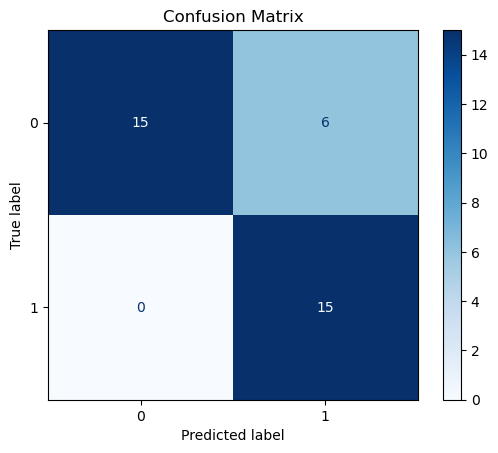

In [69]:
conf = ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred_binary))
plt.figure(figsize=(10, 10))
conf.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

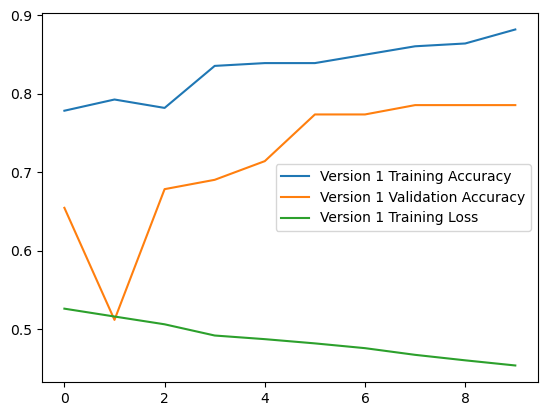

In [70]:
plt.plot(Version1.history['accuracy'], label='Version 1 Training Accuracy')
plt.plot(Version1.history['val_accuracy'], label='Version 1 Validation Accuracy')
plt.plot(Version1.history['loss'], label='Version 1 Training Loss')
plt.legend()
plt.show()

### Iteration 2

The Model second iteration presents that the loss is less, with not much, buit less, which means that the model gets better with each iteration.

The code below evaluates the second iteration by using the already defined function evaluate. Than I print out the accuracy , Precision , Recall, F1 Score, ROC AUC Score and a confusion matrix. After which I provide a graph which showcases the Training Acuracy, the Val Accuracy and the Training Loss.

- After everything has plotted it can be seen that the model has medium to high accuracy ( 88.88% ) and all the other matrices are also ok.Thus, there are optimizations to be done for increasing the recall.The matrices and plots are providing evidence that the model is working well, achieving a high score in performance.
- In the confusion matrix it can be observed that the model was unable to label 3 images as not tumours right and 1 as tumour.

In [76]:
# Evaluating the model
model_2.evaluate(X_test_2, y_test_encoded_2)

2/2 [==============================] - 0s 26ms/step - loss: 0.2906 - accuracy: 0.8889


[0.2906300723552704, 0.8888888955116272]

In [77]:
y_pred_2 = model_2.predict(X_test_2)
# Convert predicted values to binary format
y_pred_binary_2 = y_pred_2 > 0.5

# Calculate precision, recall, and F1 score
test_loss_2 = model_2.evaluate(X_test_2, y_test_encoded_2)
test_acc_2 = accuracy_score(y_test_encoded_2, y_pred_binary_2)
precision_2 = precision_score(y_test_encoded_2, y_pred_binary_2) 
recall_2 = recall_score(y_test_encoded_2, y_pred_binary_2)
f1_2 = f1_score(y_test_encoded_2, y_pred_binary_2)

print("Test Loss:", test_loss_2)
print("Test Accuracy:", test_acc_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1 Score:", f1_2)

1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 27ms/step - loss: 0.2906 - accuracy: 0.8889
Test Loss: [0.2906300723552704, 0.8888888955116272]
Test Accuracy: 0.8888888888888888
Precision: 0.9230769230769231
Recall: 0.8
F1 Score: 0.8571428571428571


In [78]:
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded_2, y_pred_binary_2))
print("Classification Report:\n", classification_report(y_test_encoded_2, y_pred_binary_2))
print("ROC AUC Score:", roc_auc_score(y_test_encoded_2, y_pred_binary_2))
print(X_train_2.shape, X_val_2.shape, X_test_2.shape, y_train_encoded_2.shape, y_val_encoded_2.shape, y_test_encoded_2.shape) # type: ignore

Confusion Matrix:
 [[20  1]
 [ 3 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.92      0.80      0.86        15

    accuracy                           0.89        36
   macro avg       0.90      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36

ROC AUC Score: 0.8761904761904762
(280, 256, 256, 3) (84, 256, 256, 3) (36, 256, 256, 3) (280,) (84,) (36,)


<Figure size 1000x1000 with 0 Axes>

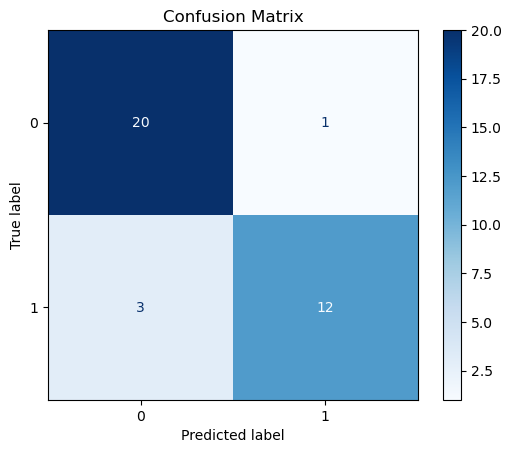

In [79]:
conf = ConfusionMatrixDisplay(confusion_matrix(y_test_encoded_2, y_pred_binary_2))
plt.figure(figsize=(10, 10))
conf.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

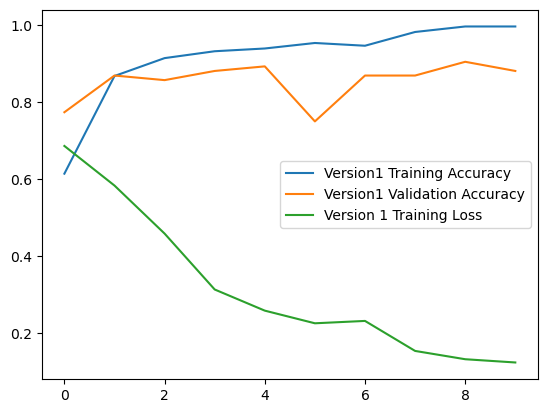

In [80]:
plt.plot(Version2.history['accuracy'], label='Version1 Training Accuracy')
plt.plot(Version2.history['val_accuracy'], label='Version1 Validation Accuracy')
plt.plot(Version2.history['loss'], label='Version 1 Training Loss')
plt.legend()
plt.show()

### Iteration 3

The code below evaluates the third iteration by using the already defined function evaluate_model_x. Than I print out the accuracy , Precision , Recall, F1 Score, ROC AUC Score and a confusion matrix. After which I provide a graph which showcases the Training Acuracy, the Val Accuracy and the Training Loss.

- After everything has plotted it can be seen that the model has medium accuracy a bit better than the Human Level, all the other matrices are also ok but there is still room for improvement for the recall class 0 and precision class 1, on top of this there can still be some work done to increase the f1-score.The matrices and plots are providing evidence that the model is working good, achieving a nice score in performance.
- In the confusion matrix it can be observed that the model was unable to label 8 images as being tumours and one as not being tumour right.

2/2 [==============================] - 1s 198ms/step
Accuracy: 0.75
Precision: 0.6363636363636364
Recall: 0.9333333333333333
F1 Score: 0.7567567567567568
ROC AUC Score: 0.8857142857142858
Confusion Matrix:
 [[13  8]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.64      0.93      0.76        15

    accuracy                           0.75        36
   macro avg       0.78      0.78      0.75        36
weighted avg       0.81      0.75      0.75        36

ROC AUC Score: 0.7761904761904762
(280, 256, 256, 3) (84, 256, 256, 3) (36, 256, 256, 3) (280,) (84,) (36,)


<Figure size 1000x1000 with 0 Axes>

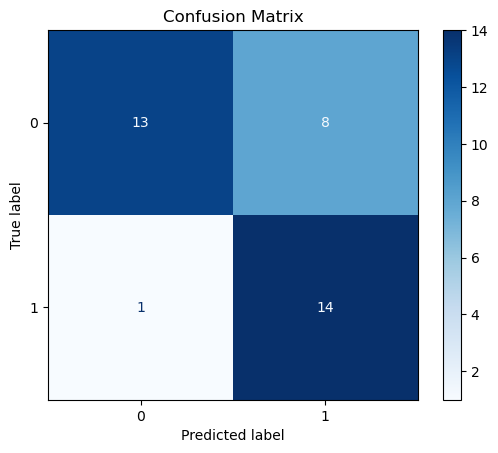

(0.75,
 0.6363636363636364,
 0.9333333333333333,
 0.7567567567567568,
 0.8857142857142858)

In [81]:
# Evaluating the model
evaluate_model_3(model_3, test_generator_1)

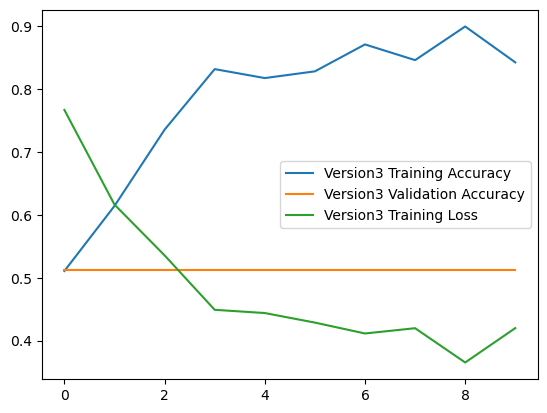

In [82]:
plt.plot(history.history['accuracy'], label='Version3 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Version3 Validation Accuracy')
plt.plot(history.history['loss'], label='Version3 Training Loss')
plt.legend()
plt.show()

### Iteration 4

The code below evaluates the forth iteration by using the already defined function evaluate_model_x. Than I print out the accuracy , Precision , Recall, F1 Score, ROC AUC Score and a confusion matrix. After which I provide a graph which showcases the Training Acuracy, the Val Accuracy and the Training Loss.

- After everything has plotted it can be seen that the model has medium accuracy and all the other matrices are also ok but there is still room for improvement.The matrices and plots are providing evidence that the model is working good, achieving a good score in performance.
- In the confusion matrix it can be observed that the model was unable to label 6 images as being not tumours right.

2/2 [==============================] - 0s 23ms/step
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.6
F1 Score: 0.75
ROC AUC Score: 0.9777777777777779
Confusion Matrix:
 [[21  0]
 [ 6  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.60      0.75        15

    accuracy                           0.83        36
   macro avg       0.89      0.80      0.81        36
weighted avg       0.87      0.83      0.82        36

ROC AUC Score: 0.8
(280, 256, 256, 3) (84, 256, 256, 3) (36, 256, 256, 3) (280,) (84,) (36,)


<Figure size 1000x1000 with 0 Axes>

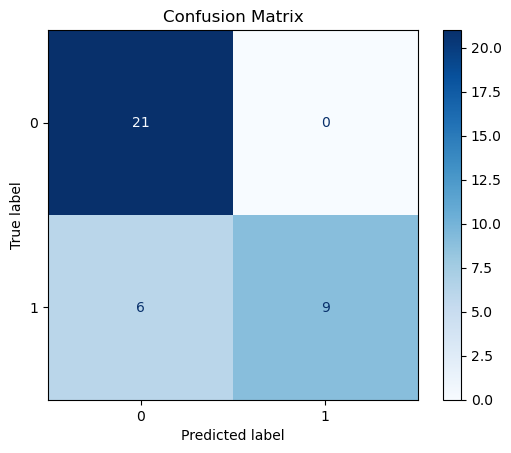

(0.8333333333333334, 1.0, 0.6, 0.75, 0.9777777777777779)

In [83]:
evaluate_model_4(model_4, test_generator_2)

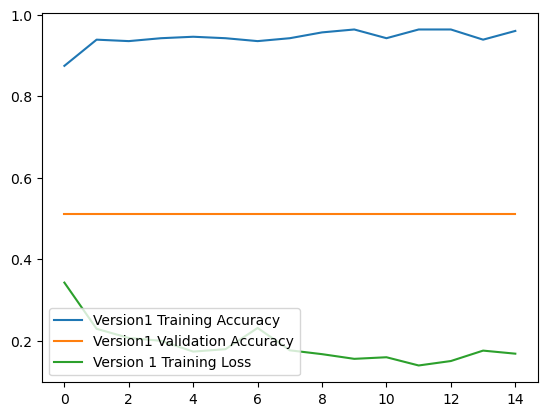

In [84]:
plt.plot(fine_tune_model_4.history['accuracy'], label='Version1 Training Accuracy')
plt.plot(fine_tune_model_4.history['val_accuracy'], label='Version1 Validation Accuracy')
plt.plot(fine_tune_model_4.history['loss'], label='Version 1 Training Loss')
plt.legend()
plt.show()

### Iteration 5


The code below evaluates the fifth iteration by using the already defined function evaluate_model_x. Than I print out the accuracy , Precision , Recall, F1 Score, ROC AUC Score and a confusion matrix. After which I provide a graph which showcases the Training Acuracy, the Val Accuracy and the Training Loss.

- After everything has plotted it can be seen that the model has high accuracy and all the other matrices are quite high as well, providing evidence that the model is working good, achieving high performance.
- In the confusion matrix it can be observed that the model is wrongly labelling  one image as not being tumour and 2 as tumours.

2/2 [==============================] - 2s 193ms/step
Accuracy: 0.9166666666666666
Precision: 0.875
Recall: 0.9333333333333333
F1 Score: 0.9032258064516129
ROC AUC Score: 0.9746031746031746
Confusion Matrix:
 [[19  2]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.88      0.93      0.90        15

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

ROC AUC Score: 0.919047619047619
(280, 256, 256, 3) (84, 256, 256, 3) (36, 256, 256, 3) (280,) (84,) (36,)


<Figure size 1000x1000 with 0 Axes>

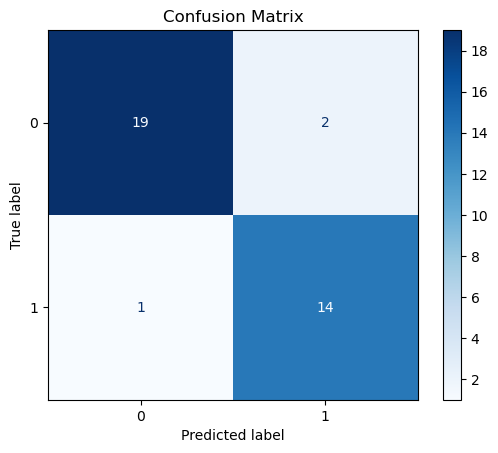

(0.9166666666666666,
 0.875,
 0.9333333333333333,
 0.9032258064516129,
 0.9746031746031746)

In [85]:
evaluate_model_5(model_5, test_generator)

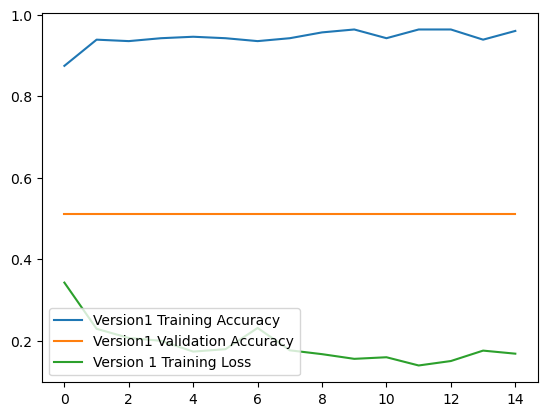

In [86]:
plt.plot(fine_tune_history.history['accuracy'], label='Version1 Training Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Version1 Validation Accuracy')
plt.plot(fine_tune_history.history['loss'], label='Version 1 Training Loss')
plt.legend()
plt.show()

## Task 3.6 Error Analysis

The following code is a function named plot_wrong_classifications() that can help visualize the instances in a test set that have been misclassified by a trained machine learning model. This function can be quite useful for analyzing the performance of the model and identifying areas where it can be improved, particularly when working with multiple CNN models that have different implementations.


Here's a brief explanation of what the code from each iteration does: (I think that there is no need to explain the same thing in all iterations, thus being the same, only using their variables)
First, it identifies the instances that have been misclassified by taking in the trained model, the test data (X_data), the true labels (y_true), the predicted labels (y_pred_classes), and the class labels (classes). It then uses the np.where() function to find the indices of the instances where the true label does not match the predicted label. After which showcases the cases were the prediction was wrong. After which I keep on doing the same thing for all iterations , checking all 5 models.

In [87]:
def plot_wrong_classifications(model, X_data, y_true, y_pred_classes, classes):
    wrong_indices = np.where(y_true != y_pred_classes)[0]
 
    # Adjusting the figure size and subplots based on the number of wrong classifications
    num_wrong = len(wrong_indices)
    num_cols = 3
    num_rows = (num_wrong // num_cols) + (1 if num_wrong % num_cols != 0 else 0)
 
    plt.figure(figsize=(15, 5 * num_rows))
 
    for i, wrong_index in enumerate(wrong_indices):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(X_data[wrong_index])
        plt.title(f"True: {classes[y_true[wrong_index]]}\nPred: {classes[y_pred_classes[wrong_index]]}")
        plt.axis('off')
 
    plt.tight_layout()
    plt.show()

In [88]:
# Extract unique class labels from the dataframe
classes = dataframe['class'].unique().tolist()
print("Class Labels:", classes)


Class Labels: ['Not Tumour', 'Tumour']


### Iteration 1

In the first iteration it can be observed the six images that were wrongly predicted.

2/2 [==============================] - 0s 16ms/step


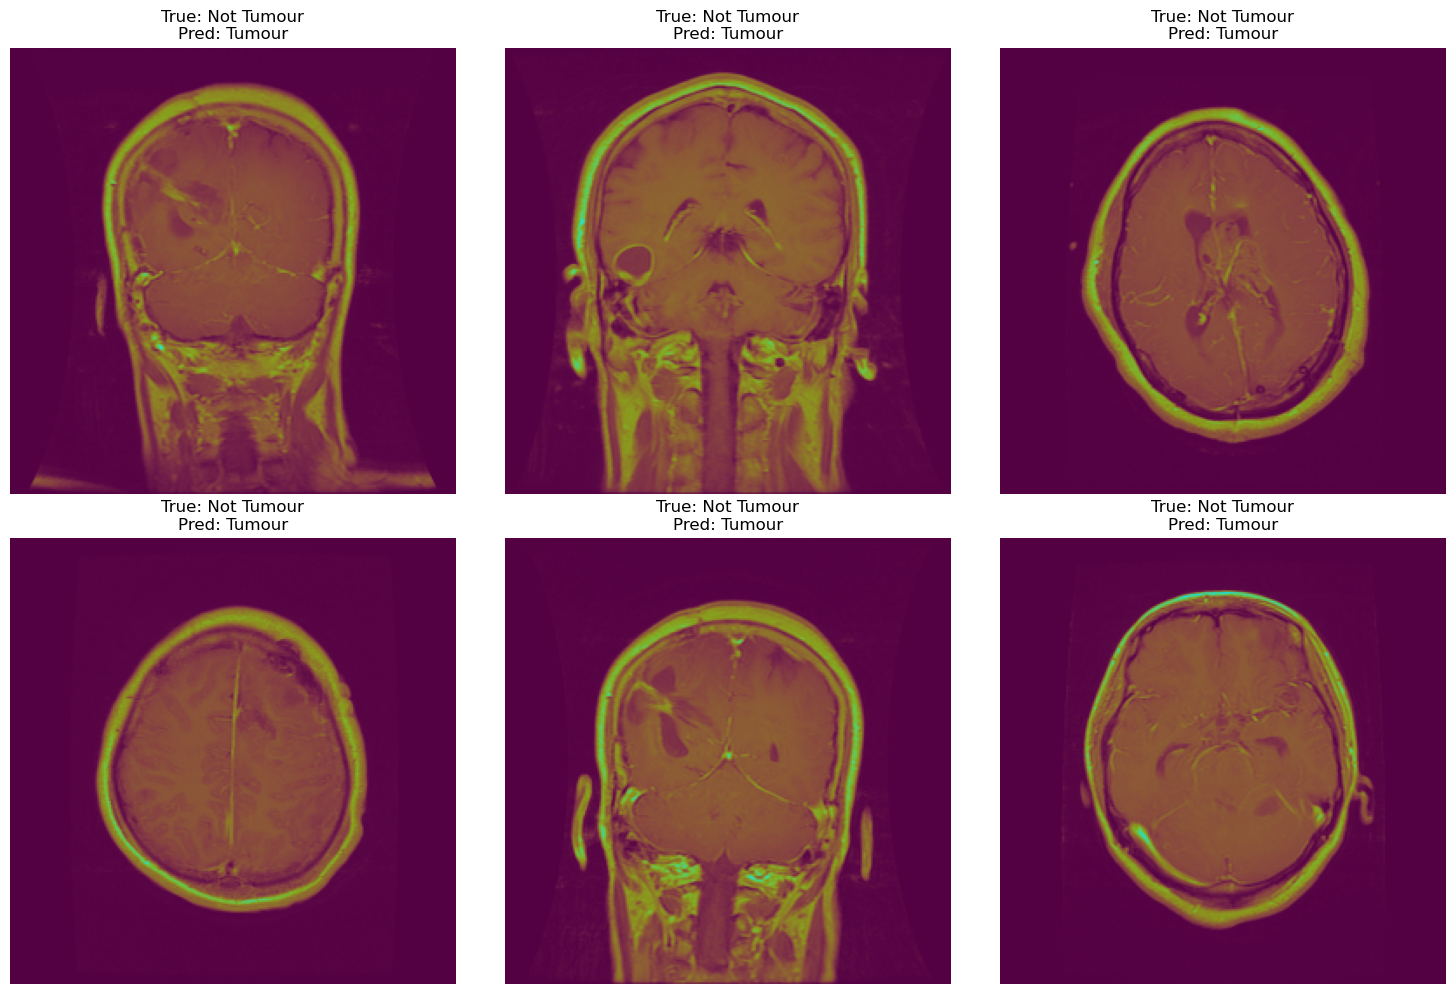

In [89]:
# Get predictions on the test set for the first iteration
predictions_1 = model_1.predict(X_test)
 
# Extract predicted labels
predicted_labels_iteration_1 = np.squeeze(predictions_1 > 0.5)

# Use y_test_encoded as actual labels
actual_labels_iteration_1 = y_test_encoded
 
# Find instances where predictions do not match labels
mismatches = np.where(predicted_labels_iteration_1 != actual_labels_iteration_1)[0]
 
# Store the wrong predictions
wrong_predictions_iteration_1 = X_test[mismatches]

# Plot misclassified images for the first iteration
plot_wrong_classifications(model_1, X_test, y_test_encoded, predicted_labels_iteration_1, classes)

### Iteration 2

In the second iteration it can be observed the four images that were wrongly predicted.

2/2 [==============================] - 0s 25ms/step


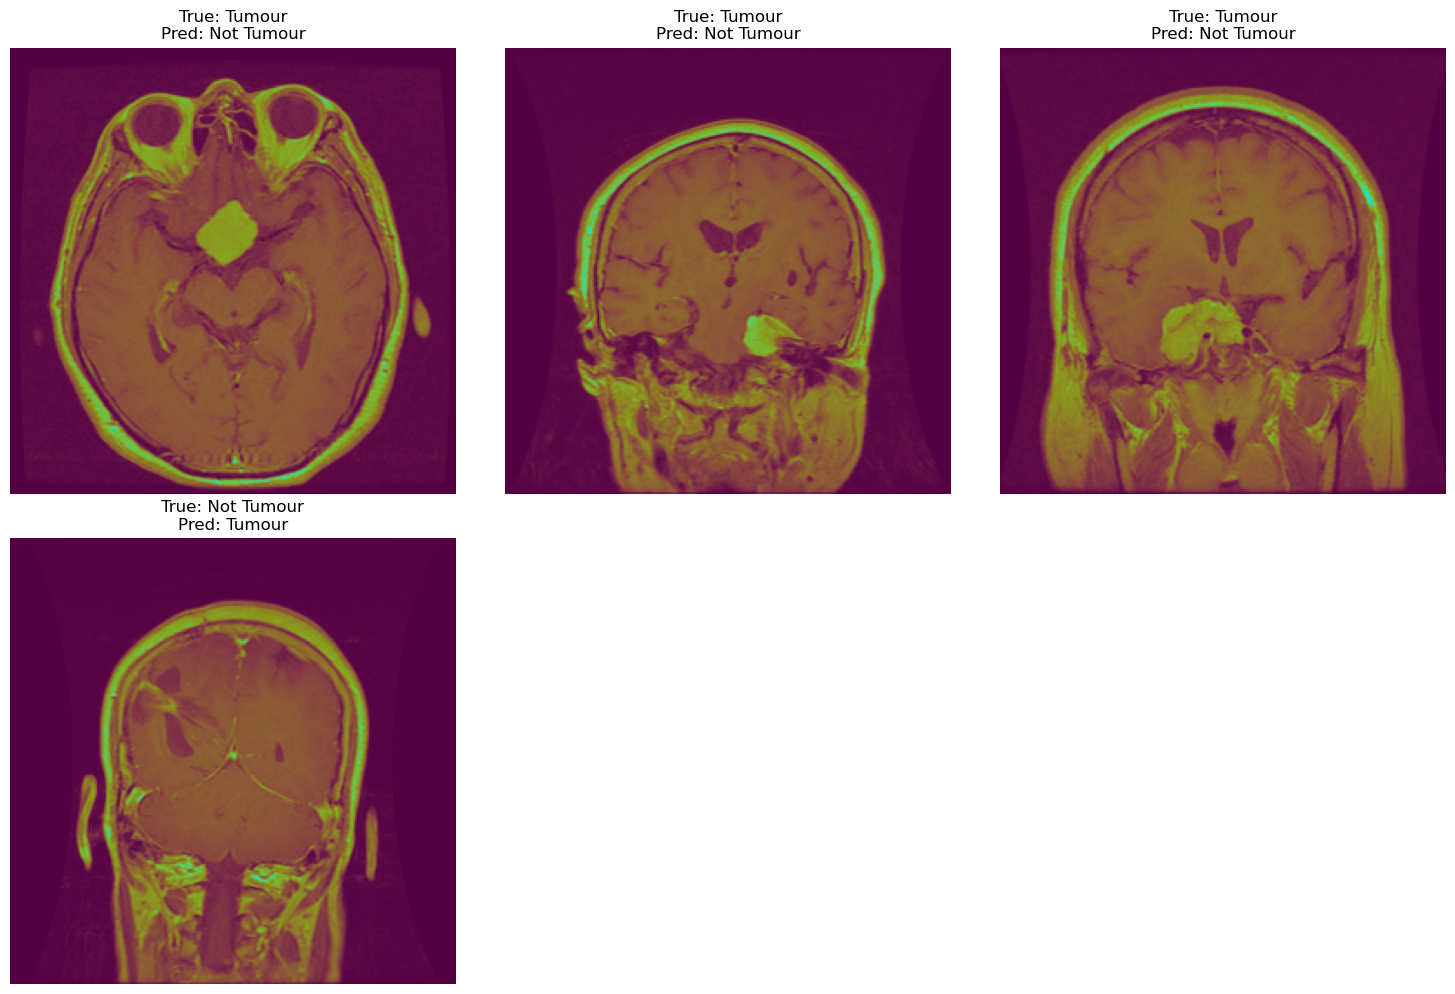

In [90]:
# Get predictions on the test set for the first iteration
predictions_2 = model_2.predict(X_test_2)
 
# Extract predicted labels
predicted_labels_iteration_2 = np.squeeze(predictions_2 > 0.5)

# Use y_test_encoded as actual labels
actual_labels_iteration_2 = y_test_encoded_2
 
# Find instances where predictions do not match labels
mismatches = np.where(predicted_labels_iteration_2 != actual_labels_iteration_2)[0]
 
# Store the wrong predictions
wrong_predictions_iteration_2 = X_test_2[mismatches]

# Plot misclassified images for the first iteration
plot_wrong_classifications(model_2, X_test_2, y_test_encoded_2, predicted_labels_iteration_2, classes)



### Iteration 3

In the third iteration it can be observed the five images that were wrongly predicted.

2/2 [==============================] - 1s 188ms/step


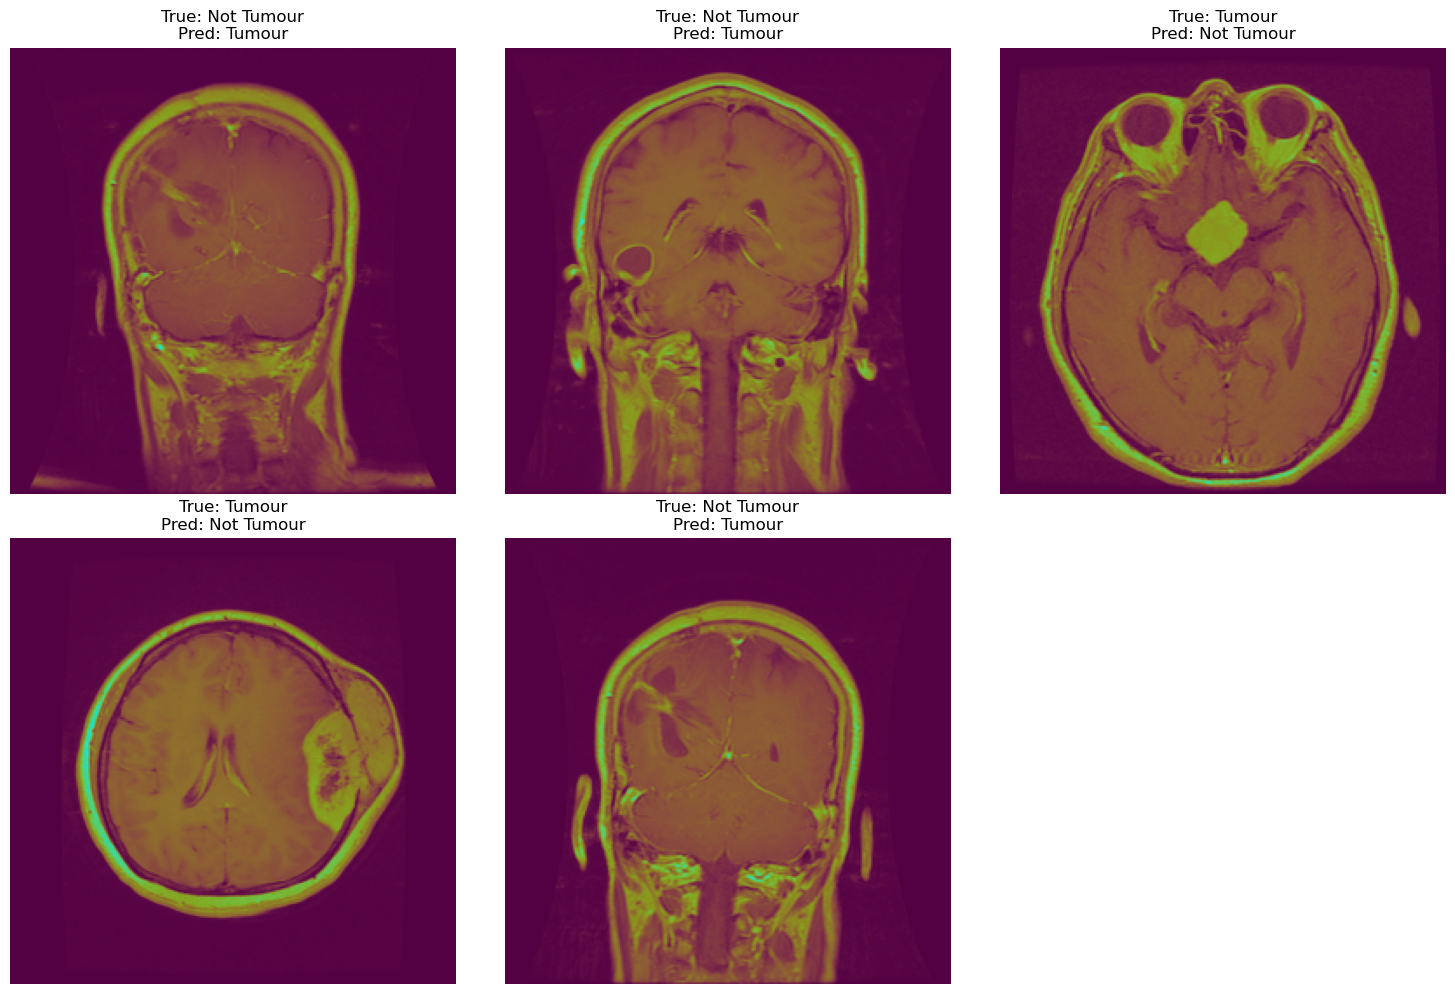

In [91]:
# Get predictions on the test set for the first iteration
predictions_3 = model_3.predict(X_test)
 
# Extract predicted labels
predicted_labels_iteration_3 = np.squeeze(predictions_3 > 0.5)

# Use y_test_encoded as actual labels
actual_labels_iteration_3 = y_test_encoded_3
 
# Find instances where predictions do not match labels
mismatches = np.where(predicted_labels_iteration_3 != actual_labels_iteration_3)[0]
 
# Store the wrong predictions
wrong_predictions_iteration_3 = X_test_3[mismatches]

# Plot misclassified images for the first iteration
plot_wrong_classifications(model_3, X_test_3, y_test_encoded_3, predicted_labels_iteration_3, classes)



### Iteration 4


In the forth iteration it can be observed the six images that were wrongly predicted.

2/2 [==============================] - 0s 21ms/step


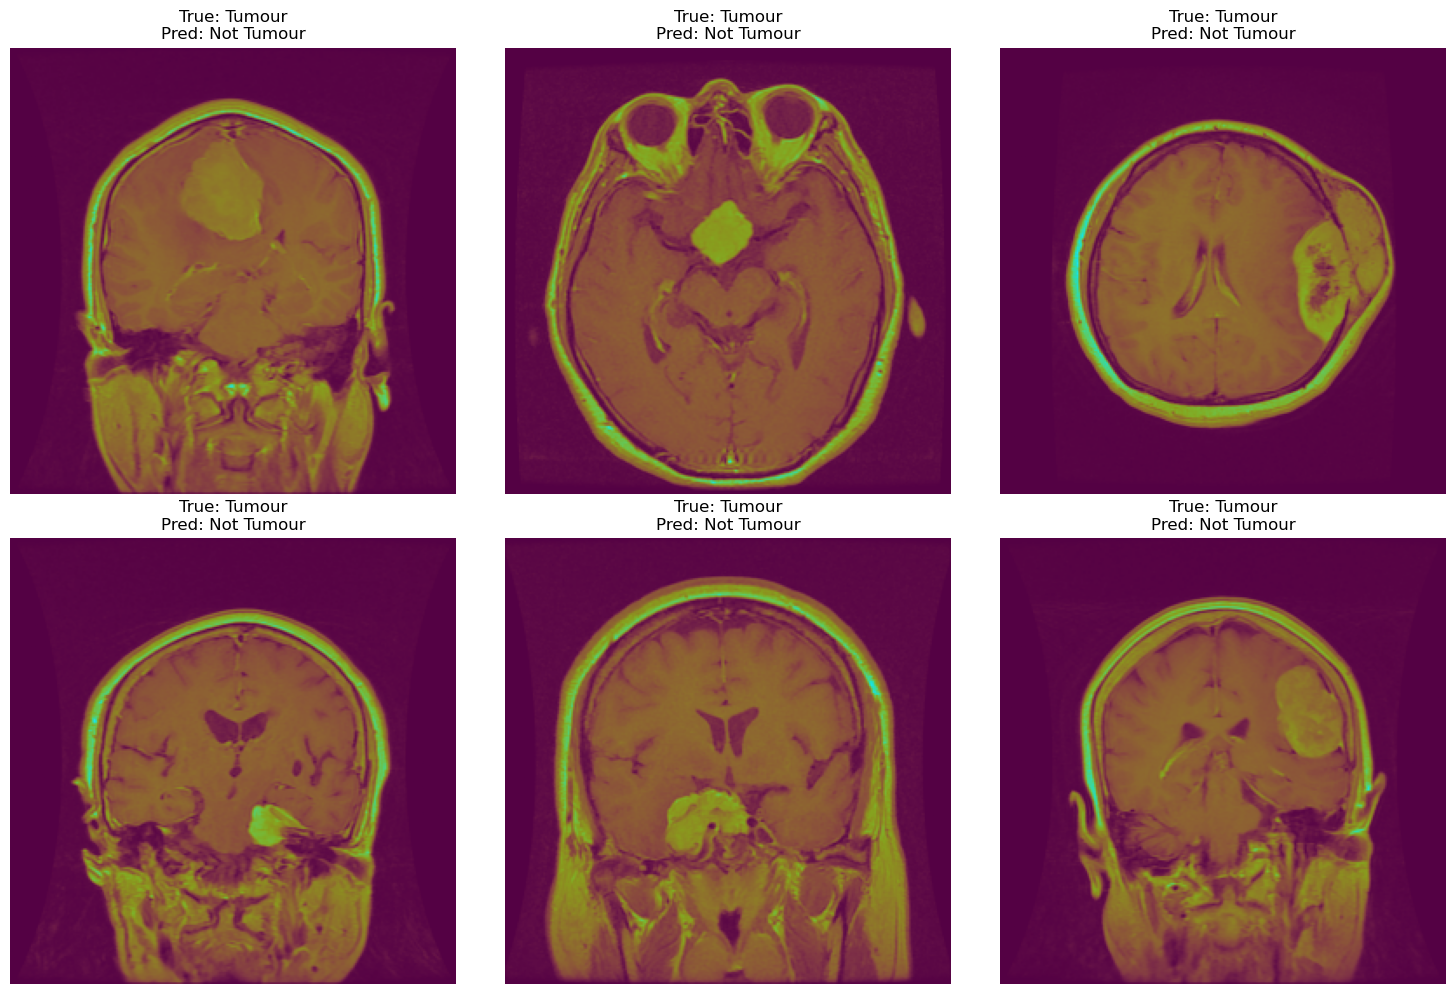

In [92]:
# Get predictions on the test set for the first iteration
predictions_4 = model_4.predict(X_test_4)
 
# Extract predicted labels
predicted_labels_iteration_4 = np.squeeze(predictions_4 > 0.5)

# Use y_test_encoded as actual labels
actual_labels_iteration_4 = y_test_encoded_4
 
# Find instances where predictions do not match labels
mismatches = np.where(predicted_labels_iteration_4 != actual_labels_iteration_4)[0]
 
# Store the wrong predictions
wrong_predictions_iteration_4 = X_test_4[mismatches]

# Plot misclassified images for the first iteration
plot_wrong_classifications(model_4, X_test_4, y_test_encoded_4, predicted_labels_iteration_4, classes)



### Iteration 5



In the fifth iteration it can be observed the three images that were wrongly predicted.

2/2 [==============================] - 1s 199ms/step


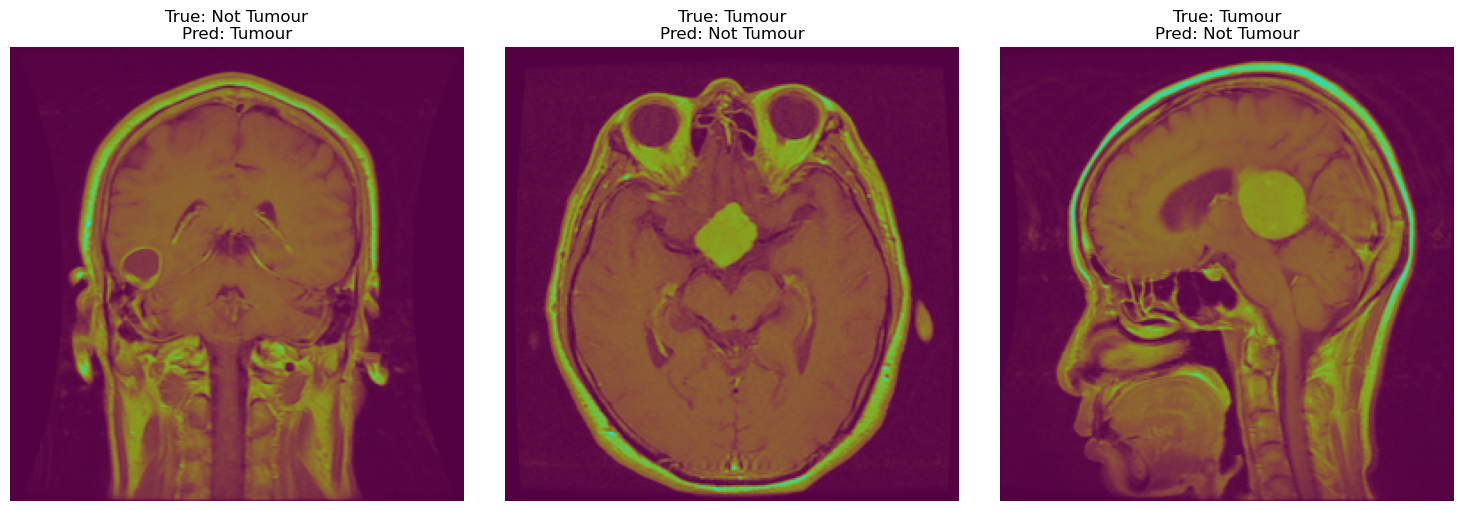

In [93]:
# Get predictions on the test set for the first iteration
predictions_5 = model_5.predict(X_test_5)
 
# Extract predicted labels
predicted_labels_iteration_5 = np.squeeze(predictions_5 > 0.5)

# Use y_test_encoded as actual labels
actual_labels_iteration_5 = y_test_encoded_5
 
# Find instances where predictions do not match labels
mismatches = np.where(predicted_labels_iteration_5 != actual_labels_iteration_5)[0]
 
# Store the wrong predictions
wrong_predictions_iteration_5 = X_test_5[mismatches]

# Plot misclassified images for the first iteration
plot_wrong_classifications(model_5, X_test_5, y_test_encoded_5, predicted_labels_iteration_5, classes)



## Task 3.7 MLP From Scratch

## It worked at some point but now it does not to be fixed for the retake

This code demonstrates the implementation of a Multilayer Perceptron (MLP) from scratch, without using any external machine learning libraries like TensorFlow or scikit-learn. The goal is to classify brain images as either "Tumour" or "Not Tumour".

Data Preprocessing:
The code reads the brain images from the "Brain_Images" directory, where the images are organized into two folders: "Tumour" and "Not Tumour". The images are then resized to a fixed size of 64x64 pixels, converted to grayscale, and stored in a pandas data frame along with their corresponding class labels. The feature matrix X and the target labels y are extracted from the DataFrame. The data is split into training, validation, and testing sets using a custom function called "custom_train_test_split()". The target labels are one-hot encoded to prepare them for the MLP. The input data is normalized by dividing the pixel values by 255 to scale them between 0 and 1.

Multilayer Perceptron (MLP) Implementation:
The MLP class is defined, which includes the following methods: 
- "forward()": Performs the forward pass through the MLP.
- "backward()": Implements the backpropagation algorithm to update the weights and biases.
- "sigmoid()" and "sigmoid_derivative()": Activation function and its derivative.
- "train()": Trains the MLP by iterating through the training data and updating the weights and biases.
- "predict()": Generates predictions for the input data.
- "evaluate_accuracy()": Calculates the classification accuracy on the test set.

Training and Evaluation:
The MLP is initialized with the appropriate input size, hidden layer size, output size, and learning rate. The MLP is trained for 1000 epochs using the training data, and the loss curve is recorded. The trained MLP is evaluated on the test set, and the classification accuracy is reported. The loss curve is plotted to visualize the training progress.

Results:
The final classification accuracy on the test set is 80%. This implementation demonstrates the basic structure of an MLP and how to train it from scratch without using any external libraries. It can be further improved by experimenting with different hyperparameters, network architectures, and optimization techniques.

In [133]:
# main_directory = r".\Brain_Images"
# img_data = []
# target_shape = (64, 64)  # Resize images to this shape

# for class_folder in os.listdir(main_directory):
#     class_folder_path = os.path.join(main_directory, class_folder)

#     if os.path.isdir(class_folder_path):
#         # Define class label
#         class_label = "Tumour" if class_folder.lower() == "tumour" else "Not Tumour"
#         print("Class folder:", class_folder)
#         print("Class label:", class_label)

#         # Read images and resize
#         images = [f for f in os.listdir(class_folder_path) if f.endswith('.png')]
#         for image_file in images:
#             image_path = os.path.join(class_folder_path, image_file)
#             image_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
#             resized_image = cv2.resize(image_data, target_shape, interpolation=cv2.INTER_LINEAR)
#             img_data.append({'class': class_label, 'filename': image_file, 'data': resized_image})

# # Create DataFrame
# dataframe_MLP_scratch = pd.DataFrame(img_data)
# print(dataframe_MLP_scratch.head())
# print(f"\nNumber of images: {len(dataframe_MLP_scratch)}")

# # Extract features (X) and labels (y)
# X = np.array(dataframe_MLP_scratch['data'].tolist())
# y = dataframe_MLP_scratch['class']

# def custom_train_test_split(X, y, test_size=0.2, random_state=None):
#     # Set seed for reproducibility
#     if random_state:
#         np.random.seed(random_state)
    
#     # Shuffle indices
#     indices = np.arange(len(X))
#     np.random.shuffle(indices)
    
#     # Calculate split index
#     split_idx = int((1 - test_size) * len(X))
    
#     # Split indices into training and testing sets
#     train_indices = indices[:split_idx]
#     test_indices = indices[split_idx:]
    
#     # Split data based on indices
#     X_train, X_test = X[train_indices], X[test_indices]
#     y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
#     return X_train, X_test, y_train, y_test, train_indices, test_indices

# # Apply custom train-test split
# X_train_Scratch, X_test_Scratch, y_train_Scratch, y_test_Scratch, train_indices_Scratch, test_indices_Scratch = custom_train_test_split(X, y, test_size=0.2, random_state=42)

# # Check if train and test indices are within range of the dataset
# assert len(X_train) > 0 and len(y_train) > 0, "Training data is empty"
# assert len(X_test) > 0 and len(y_test) > 0, "Testing data is empty"
# assert np.max(train_indices_Scratch) < len(X), "Train indices out of range"
# assert np.max(test_indices_Scratch) < len(X), "Test indices out of range"

# # Split the training set into training and validation sets
# X_train_Scratch, X_val_Scratch, y_train_Scratch, y_val_Scratch, _, _ = custom_train_test_split(X_train_Scratch, y_train_Scratch, test_size=0.2, random_state=42)

# print("Training Set:", X_train_Scratch.shape, y_train_Scratch.shape)
# print("Validation Set:", X_val_Scratch.shape, y_val_Scratch.shape)
# print("Testing Set:", X_test_Scratch.shape, y_test_Scratch.shape)

# def one_hot_encode(labels):
#     class_to_int = {'Not Tumour': 0, 'Tumour': 1}
#     num_classes = len(class_to_int)
#     num_samples = len(labels)
#     encoded_labels = np.zeros((num_samples, num_classes))
#     for i, label in enumerate(labels):
#         encoded_labels[i, class_to_int[label]] = 1
#     return encoded_labels

# # Preprocess the data (assuming X contains image data)
# # Normalize the pixel values (in between 0 and 1)
# X_train_Scratch = np.array([x / 255.0 for x in X_train])
# X_val_Scratch = np.array([x / 255.0 for x in X_val])
# X_test_Scratch = np.array([x / 255.0 for x in X_test])

# y_train_encoded_Scratch = one_hot_encode(y_train_Scratch)
# y_val_encoded_Scratch = one_hot_encode(y_val_Scratch)
# y_test_encoded_Scratch = one_hot_encode(y_test_Scratch)

# # Implementing the basic structure of the MLP from scratch
# class MLP:
#     def __init__(self, input_size, hidden_size, output_size, learning_rate):
#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.output_size = output_size
#         self.learning_rate = learning_rate
        
#         # Initialize weights using He initialization
#         self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / self.input_size)
#         self.biases_input_hidden = np.zeros((1, self.hidden_size))
#         self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / self.hidden_size)
#         self.biases_hidden_output = np.zeros((1, self.output_size))
        
#     def sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
    
#     def sigmoid_derivative(self, x):
#         return x * (1 - x)
    
#     def forward(self, inputs):
#         # Forward pass
#         self.hidden_input = np.dot(inputs, self.weights_input_hidden) + self.biases_input_hidden
#         self.hidden_output = self.sigmoid(self.hidden_input)
#         self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_hidden_output)  # Sigmoid activation in the output layer
#         return self.output
    
#     def clip_gradients(self, gradients, threshold):
#         clipped_gradients = []
#         for gradient in gradients:
#             clipped_gradients.append(np.clip(gradient, -threshold, threshold))
#         return clipped_gradients
    
#     def backward(self, inputs, targets, clip_threshold=1):
#         # Backpropagation
#         # Compute gradients
#         output_error = self.output - targets
#         hidden_output_error = np.dot(output_error, self.weights_hidden_output.T)
#         hidden_input_error = hidden_output_error * self.sigmoid_derivative(self.hidden_input)

#         # Update weights and biases
#         output_gradient = np.dot(self.hidden_output.T, output_error)
#         hidden_gradient = np.dot(inputs.T, hidden_input_error)
        
#         # Clip gradients
#         output_gradient, hidden_gradient = self.clip_gradients([output_gradient, hidden_gradient], clip_threshold)
        
#         self.weights_hidden_output -= output_gradient * self.learning_rate
#         self.biases_hidden_output -= np.sum(output_error, axis=0) * self.learning_rate
#         self.weights_input_hidden -= hidden_gradient * self.learning_rate
#         self.biases_input_hidden -= np.sum(hidden_input_error, axis=0) * self.learning_rate
    
#     def train(self, inputs, targets, epochs, batch_size=32):
#         self.loss_curve = []
#         num_samples = len(inputs)
#         num_batches = num_samples // batch_size
        
#         for epoch in range(epochs):
#             # Shuffle the data at the beginning of each epoch
#             indices = np.arange(num_samples)
#             np.random.shuffle(indices)
#             inputs_shuffled = inputs[indices]
#             targets_shuffled = targets[indices]
            
#             epoch_loss = 0
            
#             for batch in range(num_batches):
#                 # Select batch
#                 start_idx = batch * batch_size
#                 end_idx = (batch + 1) * batch_size
#                 batch_inputs = inputs_shuffled[start_idx:end_idx]
#                 batch_targets = targets_shuffled[start_idx:end_idx]
                
#                 # Forward pass
#                 outputs = self.forward(batch_inputs)
                
#                 # Backward pass
#                 self.backward(batch_inputs, batch_targets)
                
#                 # Calculate batch loss
#                 batch_loss = np.mean(-batch_targets * np.log(outputs) - (1 - batch_targets) * np.log(1 - outputs))  # Binary cross-entropy loss
#                 epoch_loss += batch_loss
                
#             # Calculate average epoch loss
#             avg_epoch_loss = epoch_loss / num_batches
#             self.loss_curve.append(avg_epoch_loss)
            
#             if epoch % 100 == 0:
#                 print(f'Epoch {epoch}, Loss: {avg_epoch_loss}')
    
#     def predict(self, inputs):
#         # Forward pass to get predictions
#         return self.forward(inputs)
    
#     def evaluate_accuracy(self, inputs, targets):
#         # Forward pass to get predictions
#         predictions = self.predict(inputs)
#         # Convert predictions to labels (e.g., using argmax for classification)
#         predicted_labels = np.argmax(predictions, axis=1)
#         true_labels = np.argmax(targets, axis=1)
#         # Calculate accuracy
#         accuracy = np.mean(predicted_labels == true_labels)
#         return accuracy

# X_train_Scratch = X_train_Scratch.reshape(X_train_Scratch.shape[0], -1)
# X_val_Scratch = X_val_Scratch.reshape(X_val_Scratch.shape[0], -1)
# X_test_Scratch = X_test_Scratch.reshape(X_test_Scratch.shape[0], -1)

# # Initializing the MLP model with input size, hidden size, output size, and learning rate
# input_size = X_train_Scratch.shape[1]  # Size-input layer
# hidden_size = 128  #neurons in the hidden layer
# output_size = 2  #Number of classes
# learning_rate = 0.0001
# mlp = MLP(input_size, hidden_size, output_size, learning_rate)

# # Train the MLP
# mlp.train(X_train_Scratch, y_train_encoded_Scratch, epochs=2000, batch_size=32)

# # Evaluate the performance of the trained MLP
# # Evaluate accuracy
# accuracy = mlp.evaluate_accuracy(X_test_Scratch, y_test_encoded_Scratch)
# print("Accuracy:", accuracy)

# # Plot the loss curve
# plt.plot(mlp.loss_curve)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training Loss Curve')
# plt.show()

# Section 4 - Human-Centered AI (Weeks 7 and 8)

## Task 4.1: Think-Aloud Study

#### LINK TO THE THINK-ALOUD STUDY FOLDER: https://edubuas-my.sharepoint.com/:f:/g/personal/221989_buas_nl/EgkzE3Nhn_VGrydskY32fDsBX-Y5hvws5Z-CEt2DIKuCVQ?e=0mAh91

## Task 4.2: A/B Testing

#### Link to the A/B EDA findings and results : https://github.com/BredaUniversityADSAI/2023-24c-fai1-adsai-MadalinaCarcea221989/blob/0171bf2f12338e7c358b448ad4347552e2b02a7f/Deliverables/T-testIndependentSamplesHCAI.ipynb

#### Link to the A Version of the form and wireframe: https://forms.office.com/Pages/DesignPageV2.aspx?origin=NeoPortalPage&subpage=design&id=m1gzCjYA6E-oKT7Qkmr4hlP1HhN2_V9Ds7F1EryHPwFUNFVDVldPTllBSFhCWDg3SjFIWFdaNFVUOS4u&topview=Preview

#### Link to the B Version of the form and wireframe: https://forms.office.com/Pages/DesignPageV2.aspx?origin=NeoPortalPage&subpage=design&id=m1gzCjYA6E-oKT7Qkmr4hlP1HhN2_V9Ds7F1EryHPwFURFhUN0c1WE5VWlFBMVFQVFYwMUxUUk1XUi4u&topview=Preview


## Task 4.3:  Create a Final Wireframe and Demo Video


#### LINK TO FINAL WIREFRAME: https://www.figma.com/proto/0HG8pMb5h5RO3LSfegtPdD/Prototype-app?page-id=0%3A1&type=design&node-id=1-3&viewport=1070%2C982%2C0.79&t=dYXf8aYKGhkGyZ01-1&scaling=scale-down&starting-point-node-id=1%3A3&show-proto-sidebar=1&mode=design
#### LINK TO DEMO : https://edubuas-my.sharepoint.com/:v:/g/personal/221989_buas_nl/ESRfsdtCaw5Llp_uQqFbcAIBGLZuZi6xu5uxmruiBUUEMA?nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=fkykwu

# Section 5 - Final Project Presentation (Week 8)

## Task 5: Presentation Slides

#### LINK TO PRESENTATION: https://edubuas-my.sharepoint.com/:p:/g/personal/221989_buas_nl/EUaKOdP5kO1AkdL-4DsIs3sBZjtu1ci2auFJDH3QerGA0Q?e=SNYXD4